# Power Visualization

In [1]:
# Boilerplate to chdir to project root and add projects sources to python http://localhost:8888/notebooks/Desktop/biosignals2/biosignals/notebooks/power-visualization.ipynb#path
import os
import sys
if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('..')
    sys.path.append(os.path.abspath('.'))

In [2]:
import biosignals.prepare as bp
import biosignals.models as bm
import biosignals.split as bs
import numpy as np

In [3]:
bp.ensure_all()

In [4]:
# bp.prepare_jit()

In [5]:
prepared = bp.read_prepared("rand")
print(prepared)

{<Role.TRAIN: 0>: [ParquetFrameLoader(path='prepared/rand\\train_0.parquet')], <Role.VALIDATE: 1>: [ParquetFrameLoader(path='prepared/rand\\validate_0.parquet')], <Role.TEST: 2>: [ParquetFrameLoader(path='prepared/rand\\test_0.parquet')]}


In [6]:
from biosignals.split import *
data = prepared[Role.TRAIN][0].load()

In [7]:
data

gamma_power   beta_power  alpha_power  theta_power  delta_power part  \
0         84.129899   991.534060  1323.552561  1467.173472  1599.385874   01   
1        248.416252  1429.946795  1475.709842  5884.947269  5757.438442   01   
2        144.521423   930.925318   381.211728  3283.976036  2116.021776   01   
3         64.825117   575.834510   288.482967  2133.609718  1563.157463   01   
4         41.259587   470.960022   289.516174  1817.998185  1218.007662   01   
...             ...          ...          ...          ...          ...  ...   
197305    17.105333    78.637540    47.737139    28.215857    91.785077   10   
197306    10.957559    57.559432    46.012080    21.978525    73.119360   10   
197307    13.783623    57.079183    48.182916    39.063627    62.829996   10   
197308    14.934066    60.127256    52.457054    70.273678    66.853115   10   
197309    15.689188    69.588527    59.607169   106.559425   121.216376   10   

        channel_id                                                eeg  \
0                0  [-75.0, -78.80859375, -81.93359375, -83.007812...   
1                1  [-50.09765625, -49.0234375, -48.6328125, -43.3...   
2                2  [-87.98828125, -85.64453125, -85.05859375, -79...   
3                3  [-87.59765625, -84.765625, -82.6171875, -78.22...   
4                4  [-104.58984375, -101.3671875, -102.05078125, -...   
...            ...                                                ...   
197305         117  [10.3515625, 12.890625, 15.625, 16.6015625, 17...   
197306         118  [16.9921875, 19.140625, 20.8984375, 20.0195312...   
197307         119  [12.01171875, 14.453125, 17.1875, 18.45703125,...   
197308         120  [16.11328125, 18.359375, 21.19140625, 20.60546...   
197309         121  [29.6875, 30.859375, 30.859375, 32.32421875, 3...   

        window_id  label  cluster_id          x          y          z  
0               0      1          20 -33.957159 -74.693203   9.042846  
1               0      1          -1 -36.957022 -72.882019   9.091264  
2               0      1          -1 -39.956885 -71.070836   9.139682  
3               0      1          -1 -42.956748 -69.259652   9.188100  
4               0      1          -1 -45.956610 -67.448468   9.236518  
...           ...    ...         ...        ...        ...        ...  
197305       1987      0           2  16.379057 -30.294177  58.279561  
197306       1987      0          -1  18.644783 -30.545484  61.043724  
197307       1987      0          -1  20.910509 -30.796790  63.807888  
197308       1987      0          -1  23.176235 -31.048096  66.572051  
197309       1987      0          -1  25.441961 -31.299402  69.336214  

[197310 rows x 14 columns]

In [9]:
df = data
positive = df[df['label'] == 1]
negative = df[df['label'] == 0]

In [10]:
positive.describe()

gamma_power     beta_power    alpha_power   theta_power   delta_power  \
count  98655.000000   98655.000000   98655.000000  9.865500e+04  9.865500e+04   
mean      57.021539     331.399919     665.371273  1.599739e+03  1.228658e+03   
std      421.910409    1574.046818    1827.546526  1.007102e+04  1.194323e+04   
min        0.000044       0.000074       0.000025  4.310866e-05  1.127183e-06   
25%        9.407197      73.767690      84.813249  9.950276e+01  5.440960e+01   
50%       17.615933     155.765544     219.429342  2.861429e+02  1.785717e+02   
75%       35.615897     318.911085     640.526627  1.258929e+03  6.741741e+02   
max    75902.038989  282089.924958  146011.049812  1.793612e+06  1.799104e+06   

         channel_id     window_id    label    cluster_id             x  \
count  98655.000000  98655.000000  98655.0  98655.000000  98655.000000   
mean      57.939233    479.113213      1.0      3.790026      0.013269   
std       35.819725    297.025446      0.0      8.991127     38.940874   
min        0.000000      0.000000      1.0     -1.000000    -74.993887   
25%       27.000000    214.000000      1.0     -1.000000    -35.772394   
50%       55.000000    487.000000      1.0     -1.000000      4.621052   
75%       89.000000    723.000000      1.0      4.000000     36.094680   
max      126.000000    993.000000      1.0     31.000000     70.658415   

                  y             z  
count  98655.000000  98655.000000  
mean     -18.327553     23.879614  
std       29.666235     24.152274  
min      -90.496547    -39.422352  
25%      -37.974629      9.381771  
50%      -22.361598     24.087275  
75%        0.182029     40.825741  
max       53.840184     85.059309

In [11]:
print("positive: " + str(positive['delta_power'].mean()))
print("negative: " + str(negative['delta_power'].mean()))

positive: 1228.6575657646383
negative: 1071.2119690370444


# Visualize power statistics across all channels

<Figure size 640x480 with 0 Axes>

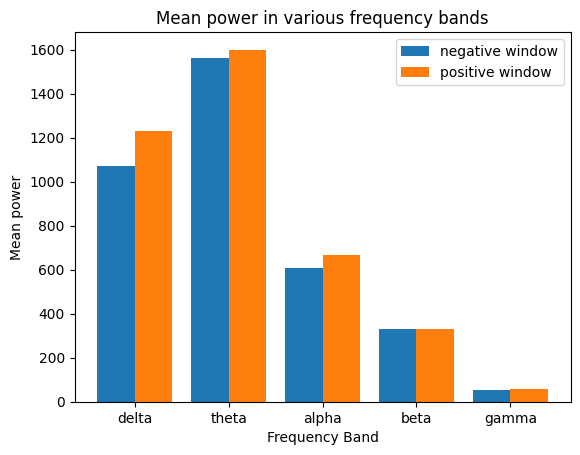

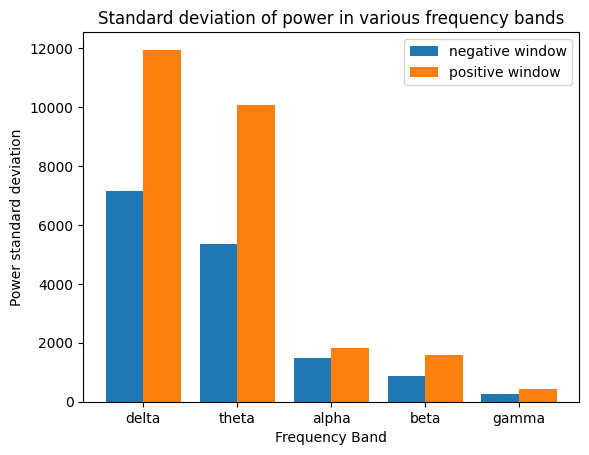

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure()
X = ['delta','theta', 'alpha', 'beta', 'gamma']
neg_mean_power = [negative['delta_power'].mean(),
                  negative['theta_power'].mean(),
                  negative['alpha_power'].mean(), 
                  negative['beta_power'].mean(),
                  negative['gamma_power'].mean(),
                 ]

pos_mean_power = [positive['delta_power'].mean(),
                  positive['theta_power'].mean(),
                  positive['alpha_power'].mean(), 
                  positive['beta_power'].mean(),
                  positive['gamma_power'].mean(),
                 ]

neg_std_power = [negative['delta_power'].std(),
                 negative['theta_power'].std(),
                 negative['alpha_power'].std(), 
                 negative['beta_power'].std(),
                 negative['gamma_power'].std(),
                ] 

pos_std_power = [positive['delta_power'].std(),
                 positive['theta_power'].std(),
                 positive['alpha_power'].std(), 
                 positive['beta_power'].std(),
                 positive['gamma_power'].std(),
                ]

X_axis = np.arange(len(X))
plt.figure()
plt.bar(X_axis - 0.2, neg_mean_power, 0.4, label = 'negative window')
plt.bar(X_axis + 0.2, pos_mean_power, 0.4, label = 'positive window')
plt.xticks(X_axis, X)
plt.xlabel("Frequency Band")
plt.ylabel("Mean power")
plt.title("Mean power in various frequency bands")
plt.legend()
plt.show()

plt.figure()
plt.bar(X_axis - 0.2, neg_std_power, 0.4, label = 'negative window')
plt.bar(X_axis + 0.2, pos_std_power, 0.4, label = 'positive window')
plt.xticks(X_axis, X)
plt.xlabel("Frequency Band")
plt.ylabel("Power standard deviation")
plt.title("Standard deviation of power in various frequency bands")
plt.legend()
plt.show()

# Visualize power statistics by cluster

In [14]:
# Multi-channels
lds = bp.read_prepared('rand')
ld = lds[bs.Role.TRAIN][0]
prepared = bm.load_multi_features(ld, use_eeg=False, n_clusters=32)
print(prepared)

(['x_0', 'y_0', 'z_0', 'theta_power_0', 'alpha_power_0', 'beta_power_0', 'gamma_power_0', 'x_1', 'y_1', 'z_1', 'theta_power_1', 'alpha_power_1', 'beta_power_1', 'gamma_power_1', 'x_2', 'y_2', 'z_2', 'theta_power_2', 'alpha_power_2', 'beta_power_2', 'gamma_power_2', 'x_3', 'y_3', 'z_3', 'theta_power_3', 'alpha_power_3', 'beta_power_3', 'gamma_power_3', 'x_4', 'y_4', 'z_4', 'theta_power_4', 'alpha_power_4', 'beta_power_4', 'gamma_power_4', 'x_5', 'y_5', 'z_5', 'theta_power_5', 'alpha_power_5', 'beta_power_5', 'gamma_power_5', 'x_6', 'y_6', 'z_6', 'theta_power_6', 'alpha_power_6', 'beta_power_6', 'gamma_power_6', 'x_7', 'y_7', 'z_7', 'theta_power_7', 'alpha_power_7', 'beta_power_7', 'gamma_power_7', 'x_8', 'y_8', 'z_8', 'theta_power_8', 'alpha_power_8', 'beta_power_8', 'gamma_power_8', 'x_9', 'y_9', 'z_9', 'theta_power_9', 'alpha_power_9', 'beta_power_9', 'gamma_power_9', 'x_10', 'y_10', 'z_10', 'theta_power_10', 'alpha_power_10', 'beta_power_10', 'gamma_power_10', 'x_11', 'y_11', 'z_11',

In [15]:
df = prepared[2]
df.describe()

x_0          y_0          z_0  theta_power_0  alpha_power_0  \
count  1790.000000  1790.000000  1790.000000    1790.000000    1790.000000   
mean     21.900312   -21.875047    27.855100     699.987134     374.507542   
std      22.845204     8.167136    22.748246    1708.095955     584.219172   
min     -28.873187   -38.078746   -15.811924       2.239657       2.673888   
25%      27.760851   -27.153136    19.239837      51.292495      41.523457   
50%      33.003844   -22.468931    37.769517     179.252303     167.826235   
75%      33.656541   -16.697958    42.068408     647.796848     464.011664   
max      38.568200    -6.575894    51.984512   37654.485349    8747.279648   

       beta_power_0  gamma_power_0          x_1          y_1          z_1  \
count   1790.000000    1790.000000  1790.000000  1790.000000  1790.000000   
mean     179.218899      22.254143    22.023573   -28.786413    37.438742   
std      187.932978      28.174610    27.883046    11.209504    21.552122   
min        4.287392       0.989357   -31.325216   -58.133613   -14.092191   
25%       44.031881       5.941198    -5.473349   -29.361410    22.456699   
50%      141.394603      13.259051    38.239529   -26.085593    49.773427   
75%      250.220184      30.091297    42.978188   -23.803979    54.582779   
max     2593.929268     438.459575    47.037071   -15.898651    57.338029   

       ...  beta_power_30  gamma_power_30         x_31         y_31  \
count  ...    1790.000000     1790.000000  1790.000000  1790.000000   
mean   ...     163.382016       21.479582   -21.761571    14.168724   
std    ...     147.879034       24.883529    25.487994    31.307692   
min    ...       8.573883        1.683272   -50.515634   -45.168242   
25%    ...      67.130322        7.340877   -43.215132    -5.062245   
50%    ...     124.459347       15.339488   -33.438994    11.510439   
75%    ...     209.988687       28.534071   -10.669263    43.518488   
max    ...    2120.422824      517.379322    35.509533    49.315685   

              z_31  theta_power_31  alpha_power_31  beta_power_31  \
count  1790.000000     1790.000000     1790.000000    1790.000000   
mean     22.453821      799.585892      234.780310     134.941583   
std      20.444409     2090.353845      501.517490     146.241180   
min     -28.053395        2.773959        4.047919       4.764368   
25%      12.819905       59.459429       50.774126      45.703500   
50%      24.433578      136.717530       94.513071      88.237606   
75%      39.521507      436.361620      198.972934     171.437357   
max      45.950047    38426.208700     6636.571451    1986.342627   

       gamma_power_31       label  
count     1790.000000  1790.00000  
mean        16.402024     0.50000  
std         25.896947     0.50014  
min          0.951936     0.00000  
25%          4.977035     0.00000  
50%          9.774912     0.50000  
75%         18.653609     1.00000  
max        498.199738     1.00000  

[8 rows x 225 columns]

In [16]:
positive = df[df['label'] == 1]
negative = df[df['label'] == 0]

In [17]:
positive.describe()

x_0         y_0         z_0  theta_power_0  alpha_power_0  \
count  895.000000  895.000000  895.000000     895.000000     895.000000   
mean    21.900312  -21.875047   27.855100     694.972273     384.060650   
std     22.851591    8.169419   22.754606    1537.548802     579.675365   
min    -28.873187  -38.078746  -15.811924       2.239657       3.376505   
25%     27.760851  -27.153136   19.239837      51.780901      42.289560   
50%     33.003844  -22.468931   37.769517     184.747621     169.061314   
75%     33.656541  -16.697958   42.068408     702.906504     483.361329   
max     38.568200   -6.575894   51.984512   19648.980884    5925.427328   

       beta_power_0  gamma_power_0         x_1         y_1         z_1  ...  \
count    895.000000     895.000000  895.000000  895.000000  895.000000  ...   
mean     171.320730      22.102157   22.023573  -28.786413   37.438742  ...   
std      169.457848      27.947039   27.890842   11.212638   21.558148  ...   
min        4.287392       0.989357  -31.325216  -58.133613  -14.092191  ...   
25%       36.333813       5.967978   -5.473349  -29.361410   22.456699  ...   
50%      138.544008      13.253512   38.239529  -26.085593   49.773427  ...   
75%      241.878180      30.435611   42.978188  -23.803979   54.582779  ...   
max     2114.564675     437.707297   47.037071  -15.898651   57.338029  ...   

       beta_power_30  gamma_power_30        x_31        y_31        z_31  \
count     895.000000      895.000000  895.000000  895.000000  895.000000   
mean      164.499028       22.332292  -21.761571   14.168724   22.453821   
std       153.096161       27.400257   25.495121   31.316446   20.450125   
min         8.573883        1.683272  -50.515634  -45.168242  -28.053395   
25%        66.699151        7.518266  -43.215132   -5.062245   12.819905   
50%       122.333669       15.779901  -33.438994   11.510439   24.433578   
75%       212.933864       28.996154  -10.669263   43.518488   39.521507   
max      2120.422824      517.379322   35.509533   49.315685   45.950047   

       theta_power_31  alpha_power_31  beta_power_31  gamma_power_31  label  
count      895.000000      895.000000     895.000000      895.000000  895.0  
mean       847.696087      270.841014     137.188420       17.577591    1.0  
std       2066.162998      603.992776     156.097016       29.261533    0.0  
min          2.773959        4.047919       8.376149        0.955336    1.0  
25%         61.513866       54.052866      46.009252        5.141004    1.0  
50%        136.157339       97.558467      88.081435       10.031907    1.0  
75%        458.333208      214.907899     173.216620       19.087695    1.0  
max      19348.517555     6636.571451    1986.342627      498.199738    1.0  

[8 rows x 225 columns]

In [18]:
negative.describe()

x_0         y_0         z_0  theta_power_0  alpha_power_0  \
count  895.000000  895.000000  895.000000     895.000000     895.000000   
mean    21.900312  -21.875047   27.855100     705.001996     364.954434   
std     22.851591    8.169419   22.754606    1863.958270     588.896939   
min    -28.873187  -38.078746  -15.811924       3.381794       2.673888   
25%     27.760851  -27.153136   19.239837      50.631016      40.820763   
50%     33.003844  -22.468931   37.769517     176.239047     166.521811   
75%     33.656541  -16.697958   42.068408     593.533934     441.288585   
max     38.568200   -6.575894   51.984512   37654.485349    8747.279648   

       beta_power_0  gamma_power_0         x_1         y_1         z_1  ...  \
count    895.000000     895.000000  895.000000  895.000000  895.000000  ...   
mean     187.117069      22.406130   22.023573  -28.786413   37.438742  ...   
std      204.539119      28.415172   27.890842   11.212638   21.558148  ...   
min        4.487819       1.068900  -31.325216  -58.133613  -14.092191  ...   
25%       52.500653       5.900550   -5.473349  -29.361410   22.456699  ...   
50%      147.474247      13.263257   38.239529  -26.085593   49.773427  ...   
75%      257.073952      29.833397   42.978188  -23.803979   54.582779  ...   
max     2593.929268     438.459575   47.037071  -15.898651   57.338029  ...   

       beta_power_30  gamma_power_30        x_31        y_31        z_31  \
count     895.000000      895.000000  895.000000  895.000000  895.000000   
mean      162.265004       20.626873  -21.761571   14.168724   22.453821   
std       142.548047       22.064513   25.495121   31.316446   20.450125   
min        12.030368        2.026818  -50.515634  -45.168242  -28.053395   
25%        68.108198        7.127993  -43.215132   -5.062245   12.819905   
50%       126.990826       15.027015  -33.438994   11.510439   24.433578   
75%       206.564484       28.089363  -10.669263   43.518488   39.521507   
max      1323.868875      362.623158   35.509533   49.315685   45.950047   

       theta_power_31  alpha_power_31  beta_power_31  gamma_power_31  label  
count      895.000000      895.000000     895.000000      895.000000  895.0  
mean       751.475696      198.719607     132.694746       15.226457    0.0  
std       2114.327830      368.659728     135.722148       21.978388    0.0  
min          4.822137        5.535164       4.764368        0.951936    0.0  
25%         56.585138       47.194520      45.656015        4.841760    0.0  
50%        139.684269       91.293247      88.596721        9.490611    0.0  
75%        417.548653      186.783971     170.594533       18.330329    0.0  
max      38426.208700     6118.925215    1350.051888      377.225065    0.0  

[8 rows x 225 columns]

<Figure size 640x480 with 0 Axes>

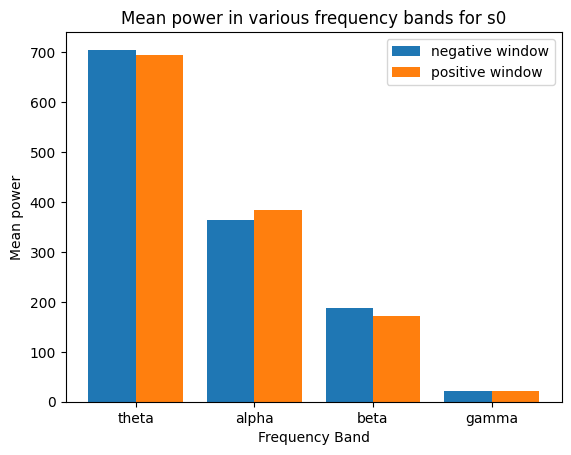

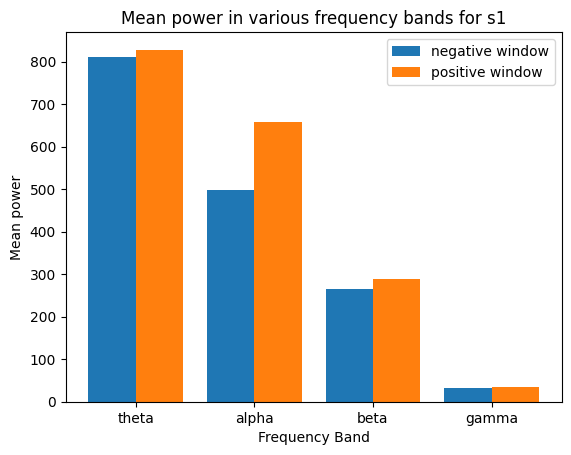

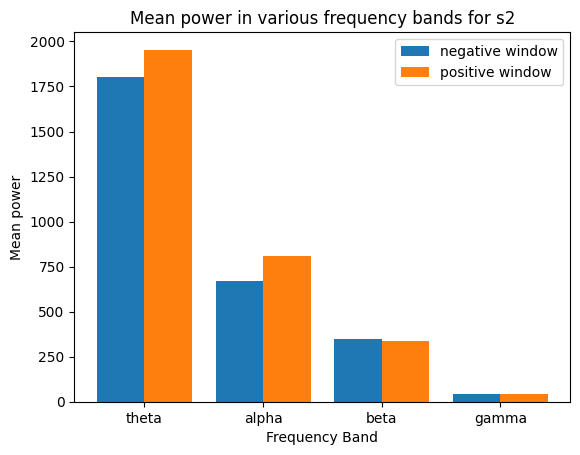

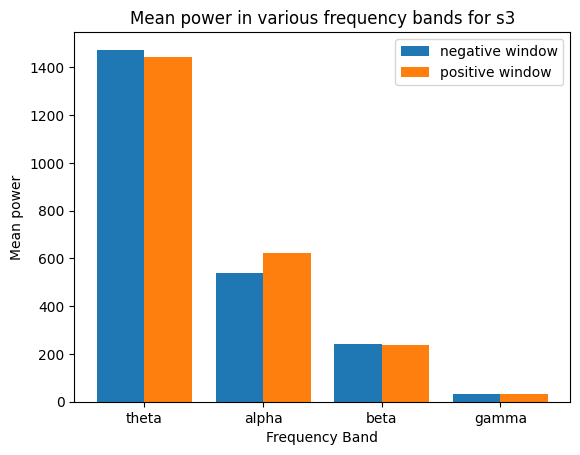

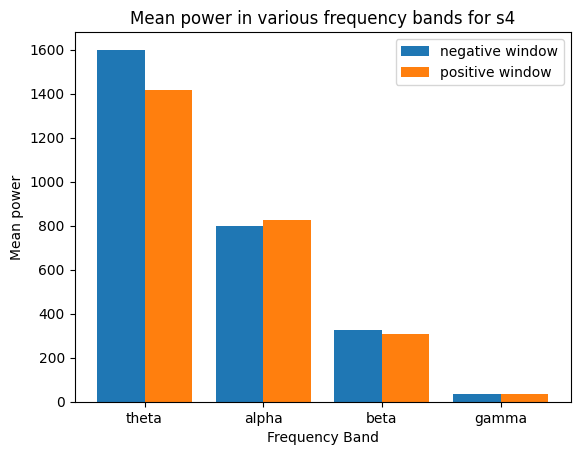

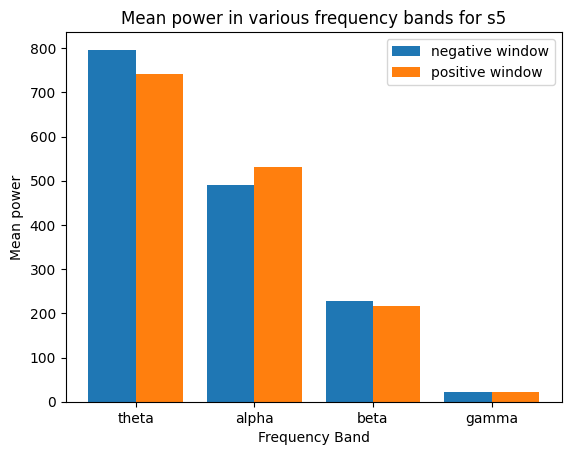

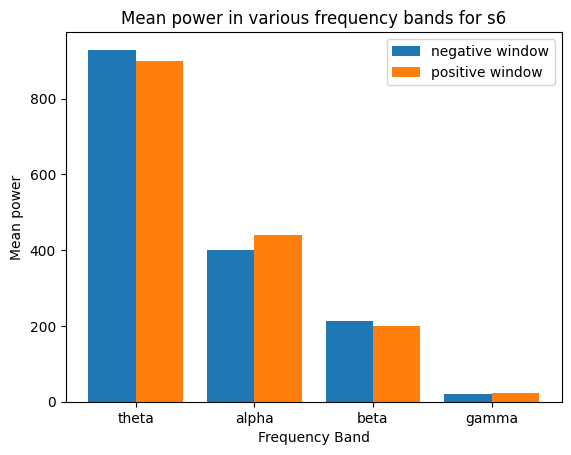

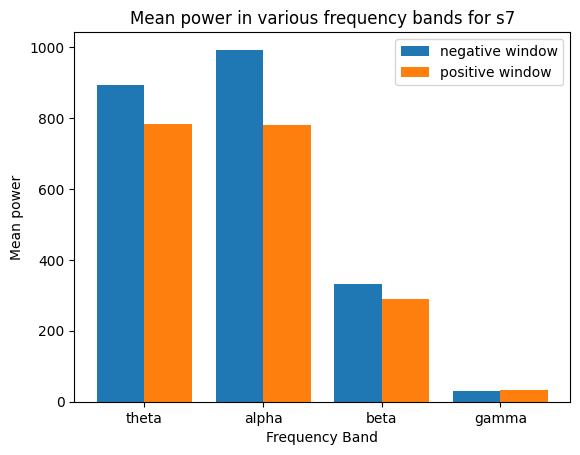

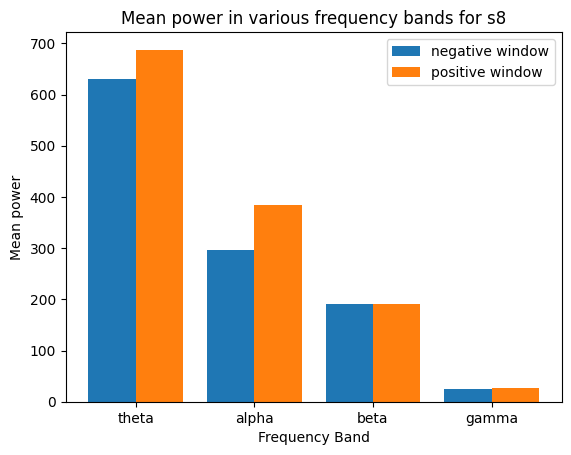

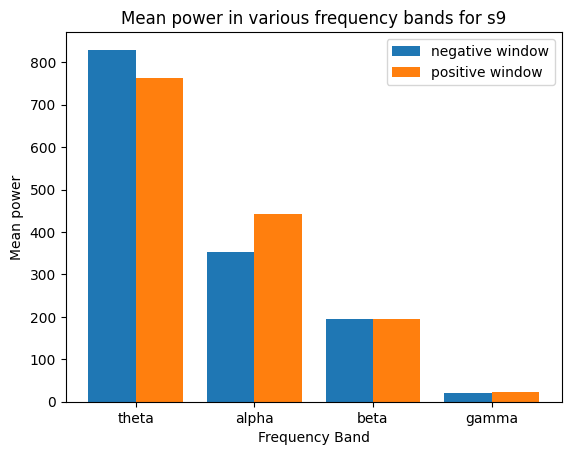

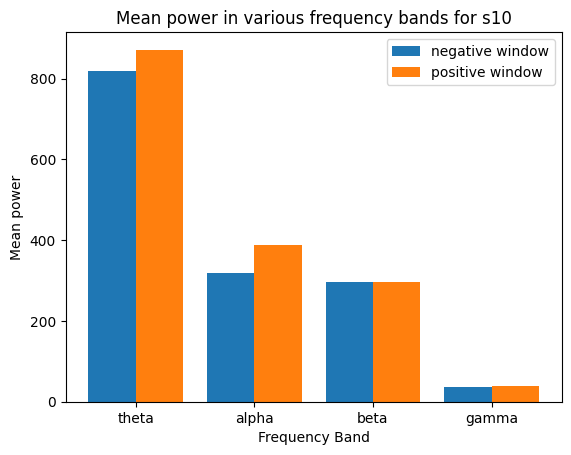

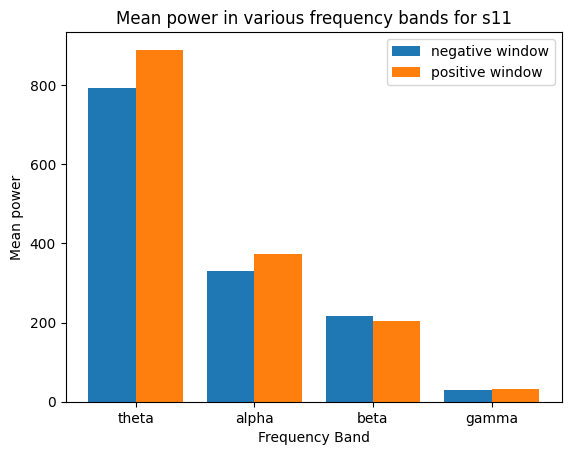

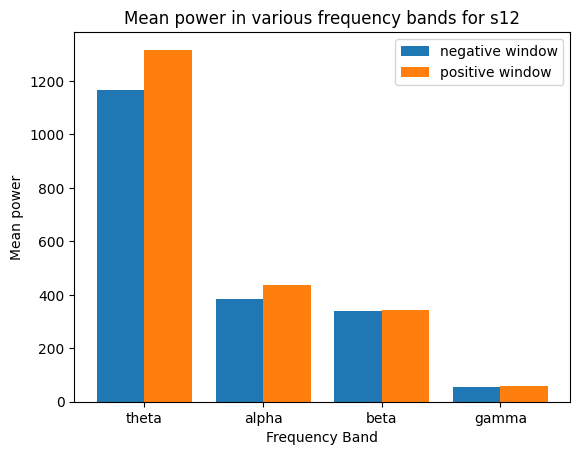

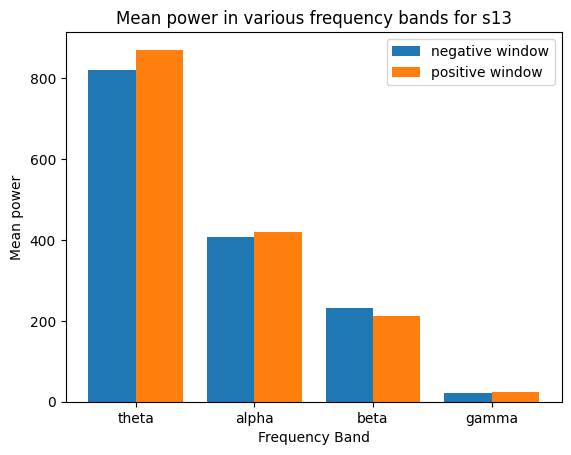

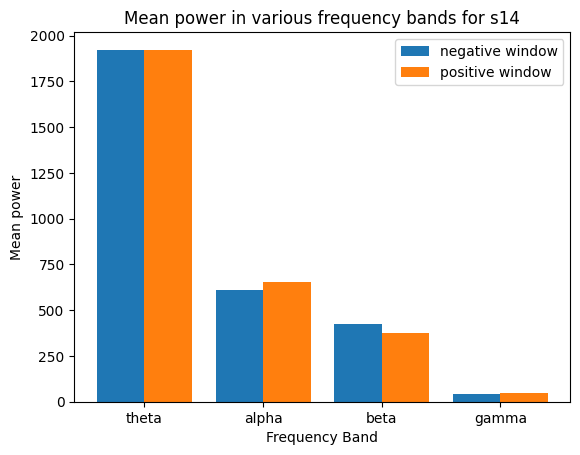

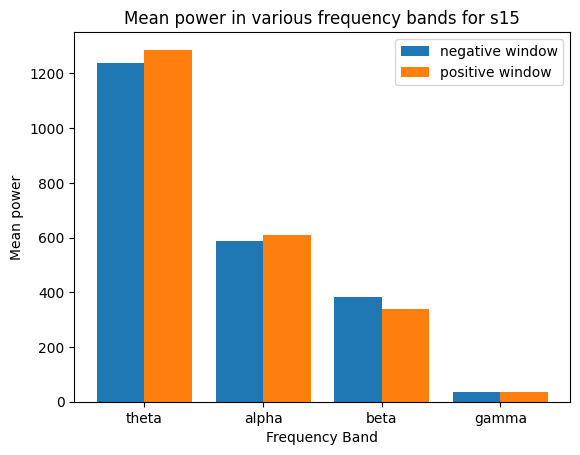

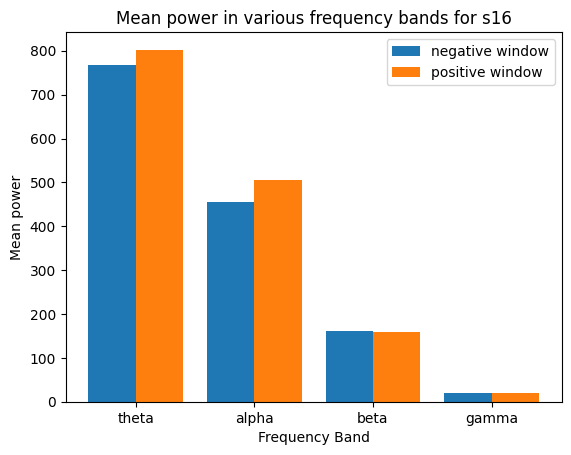

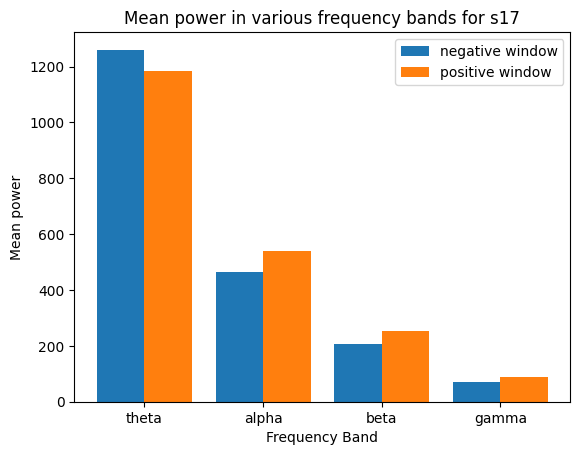

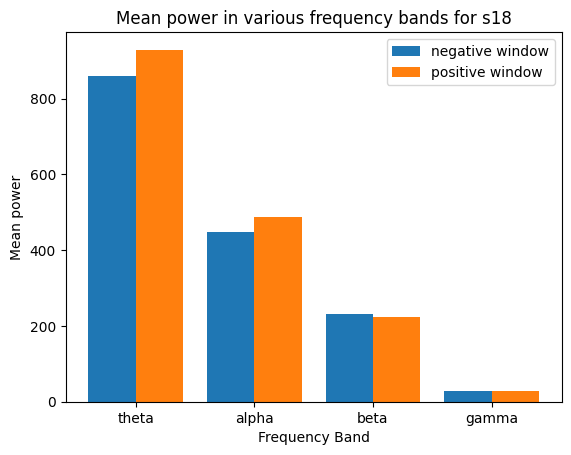

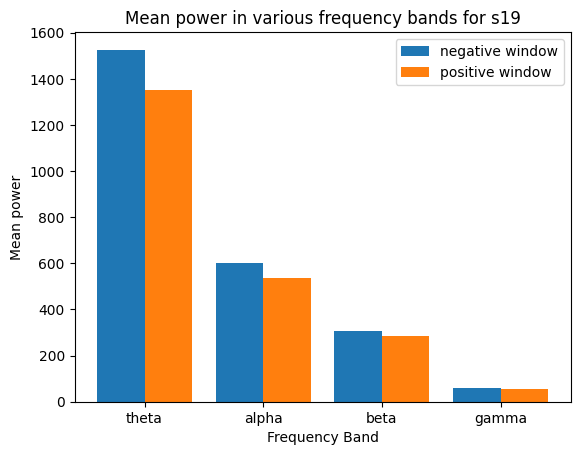

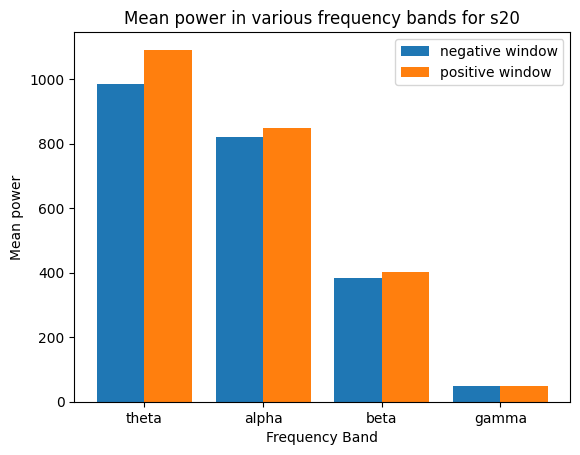

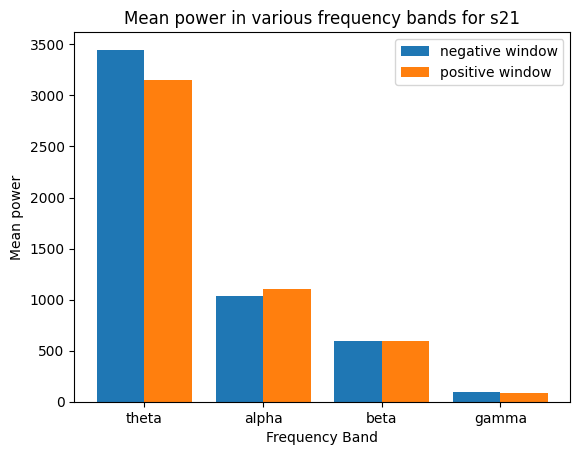

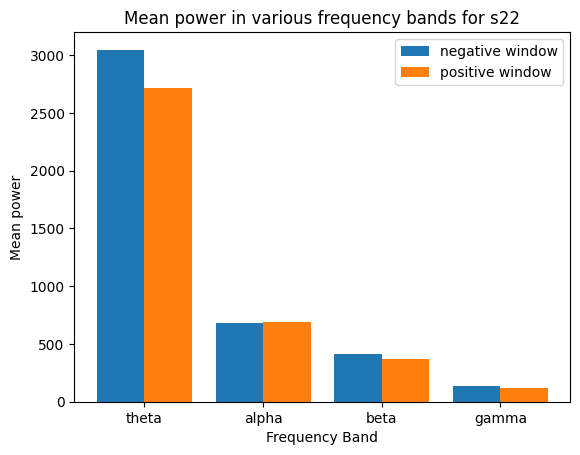

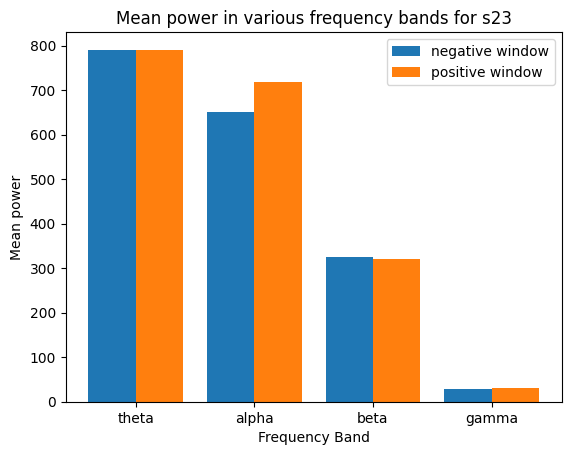

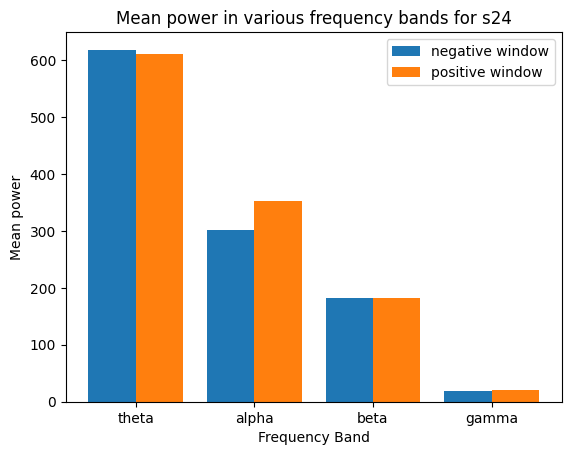

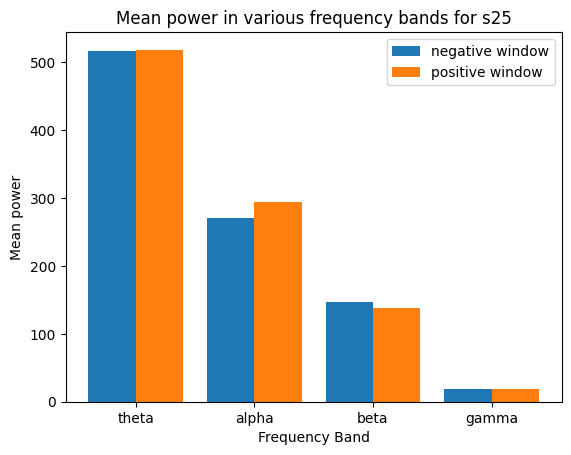

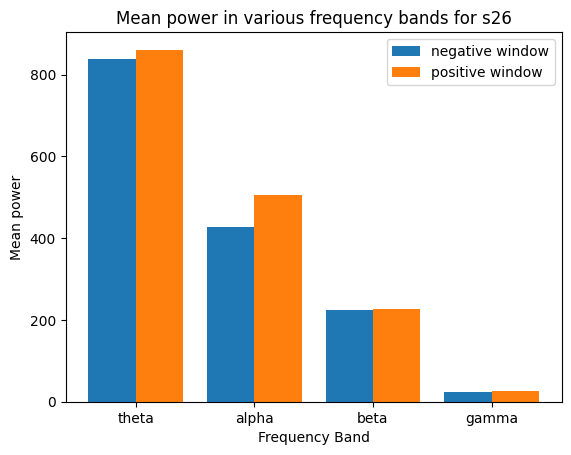

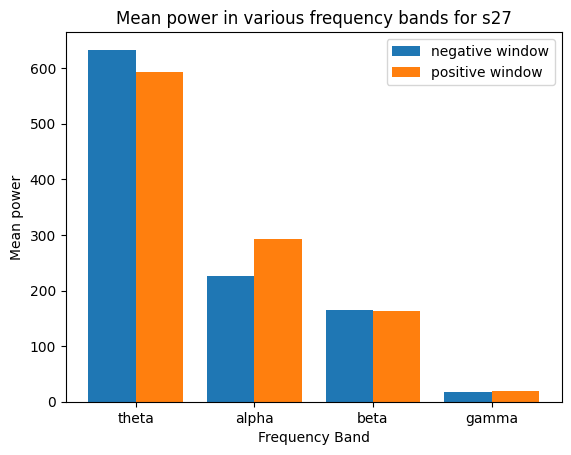

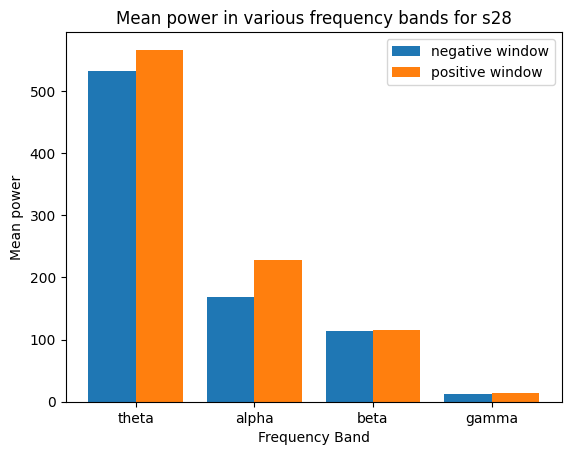

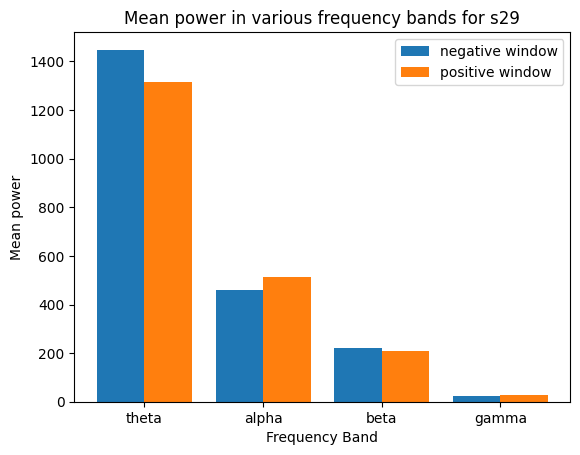

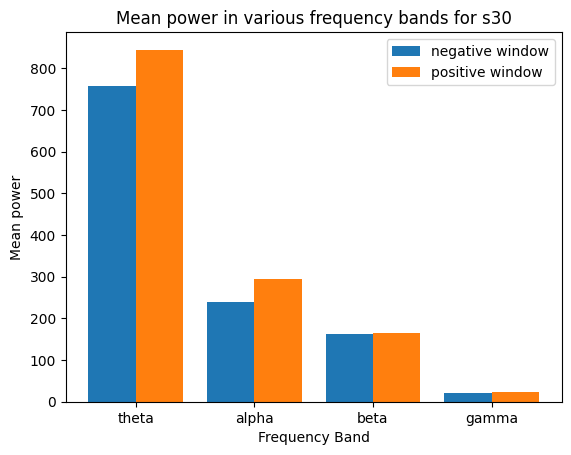

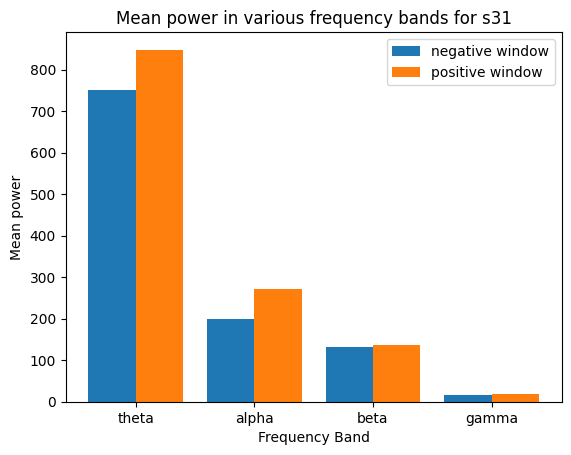

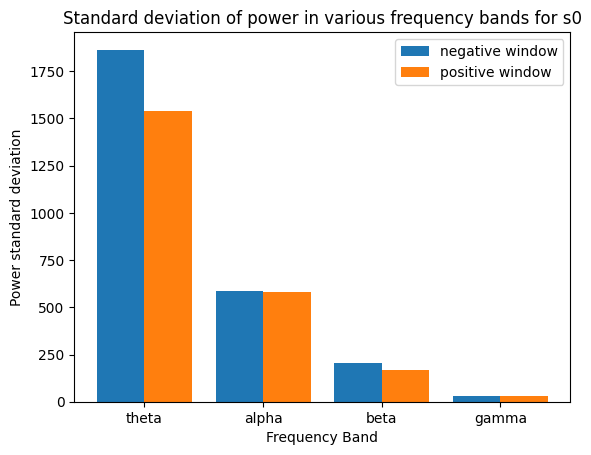

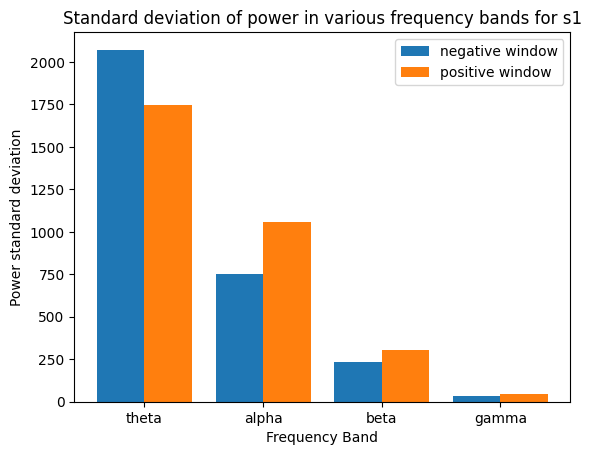

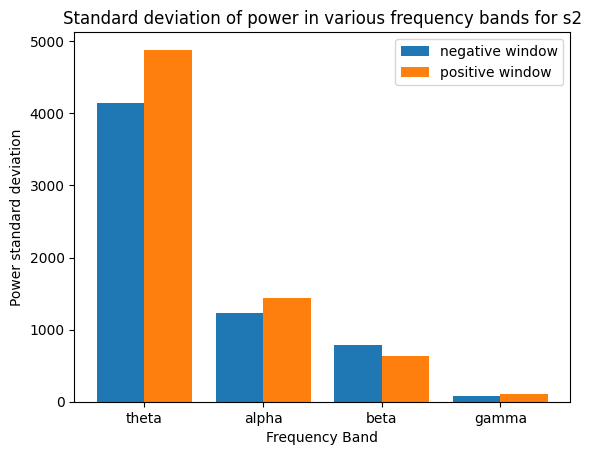

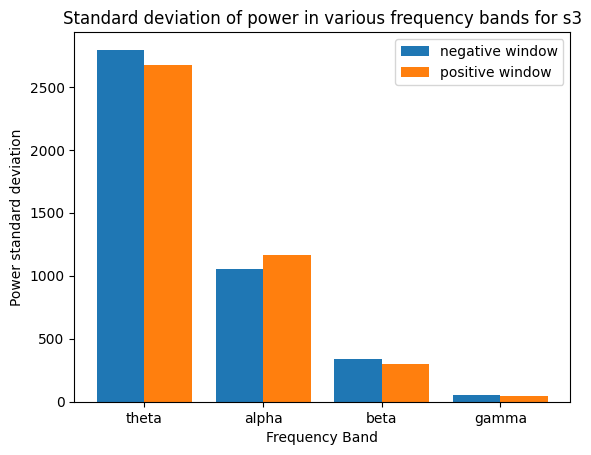

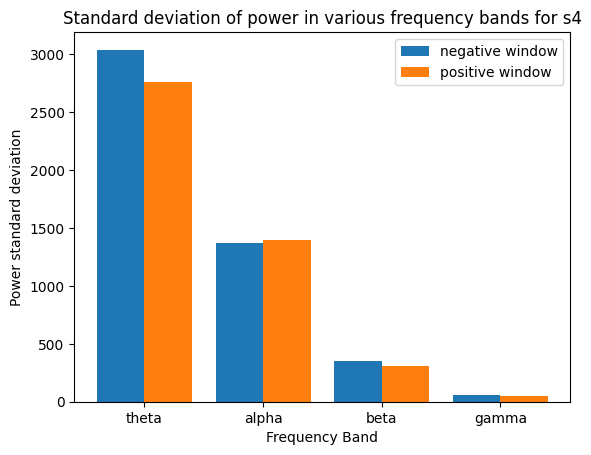

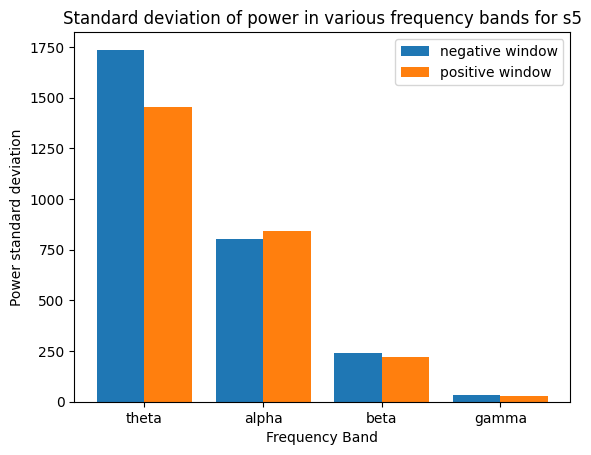

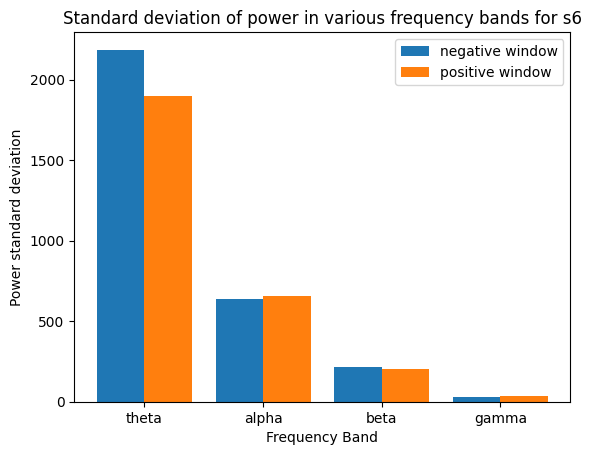

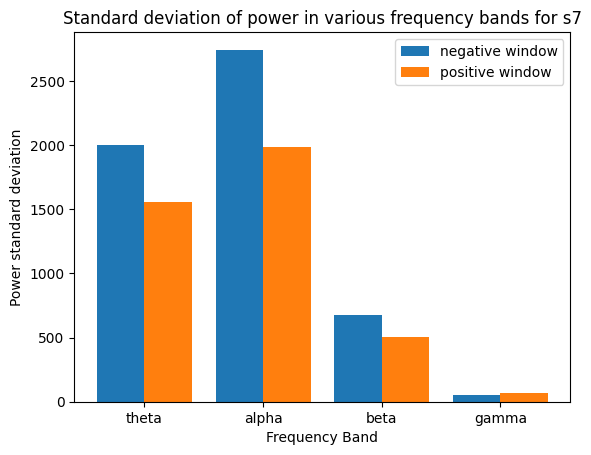

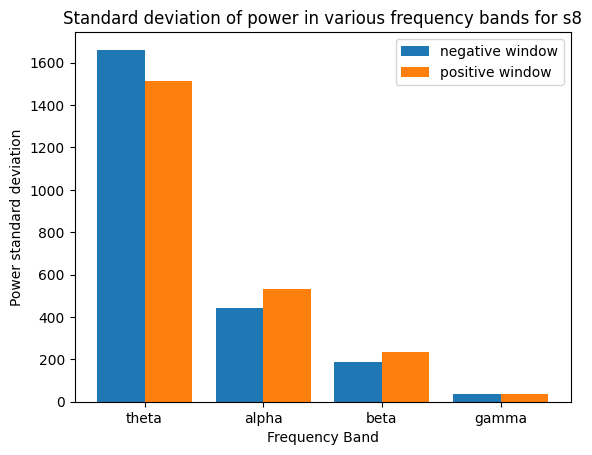

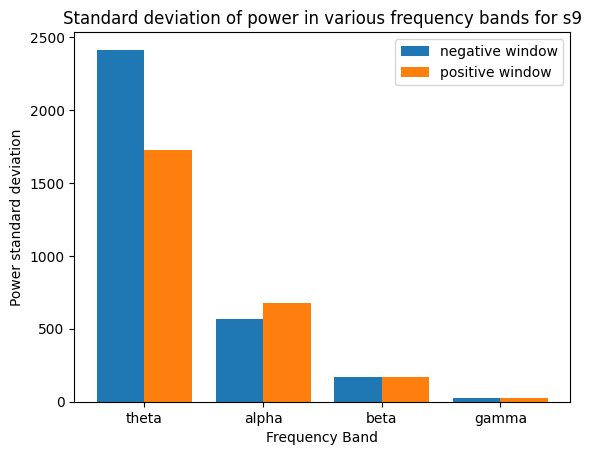

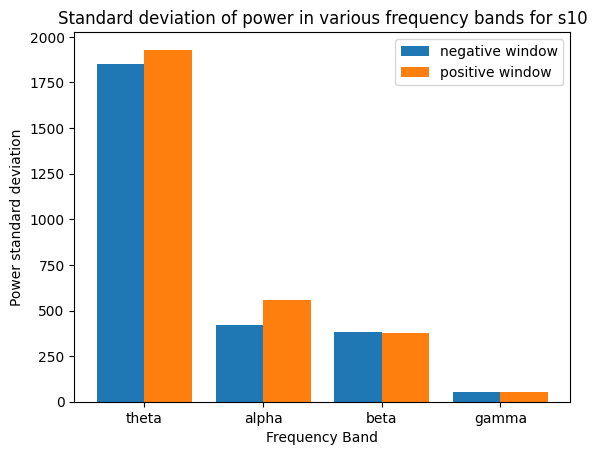

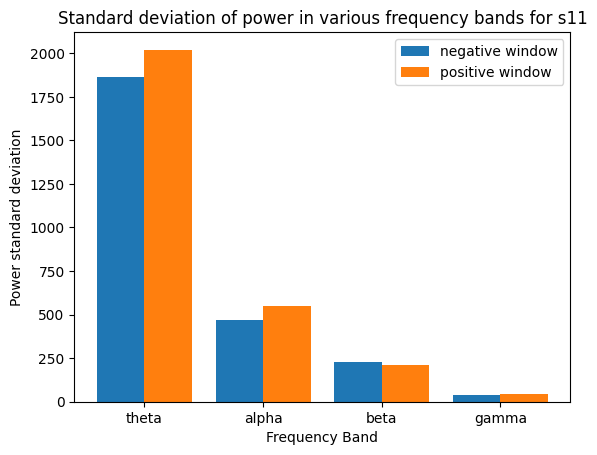

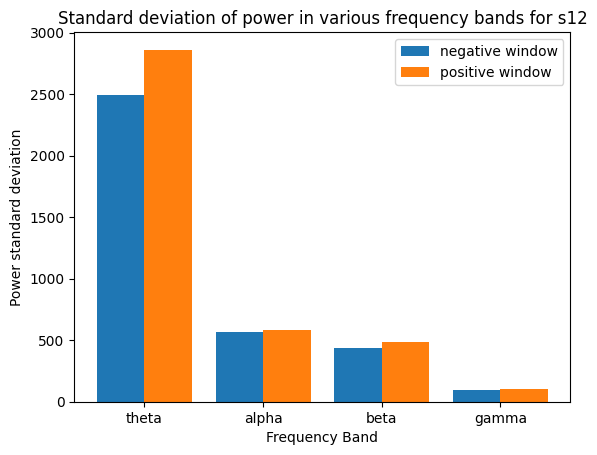

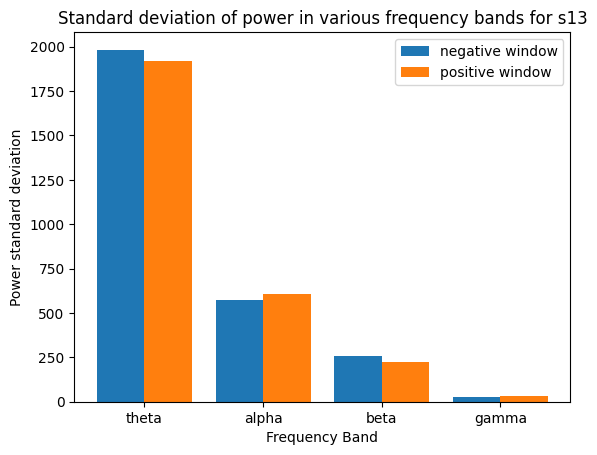

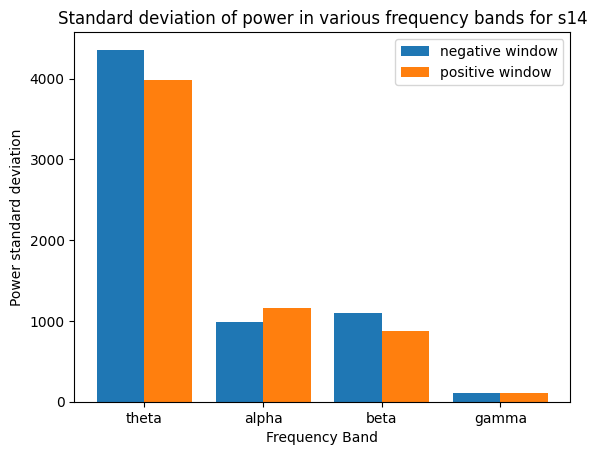

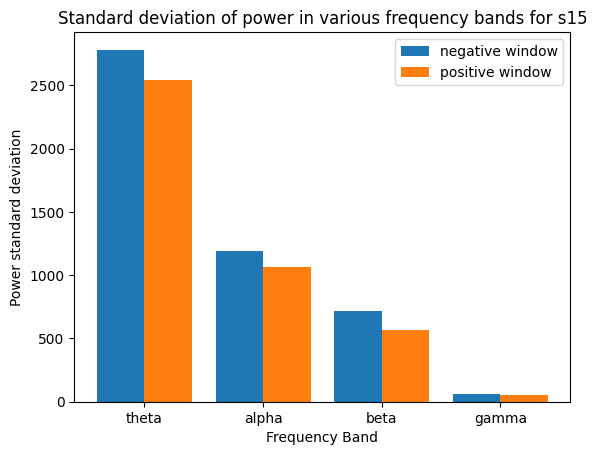

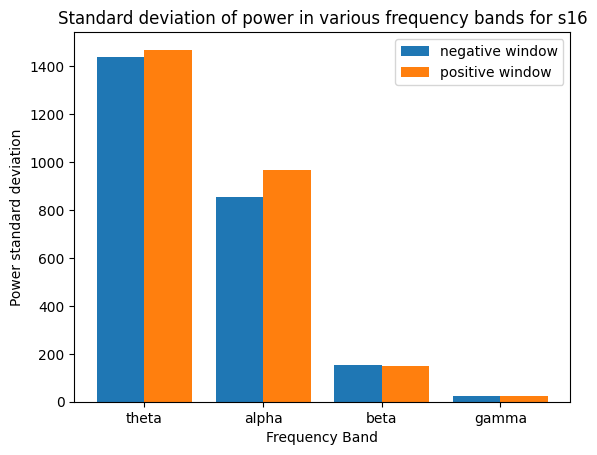

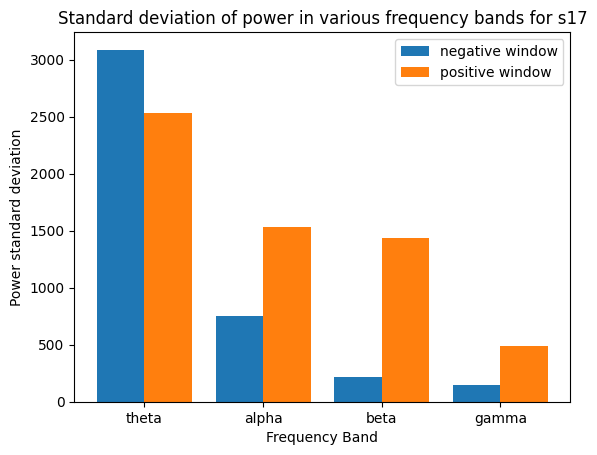

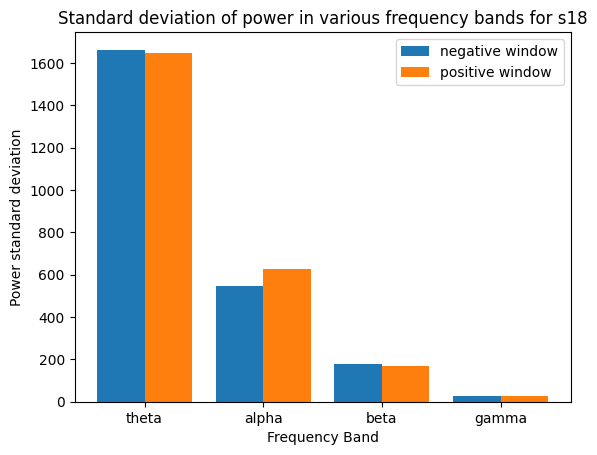

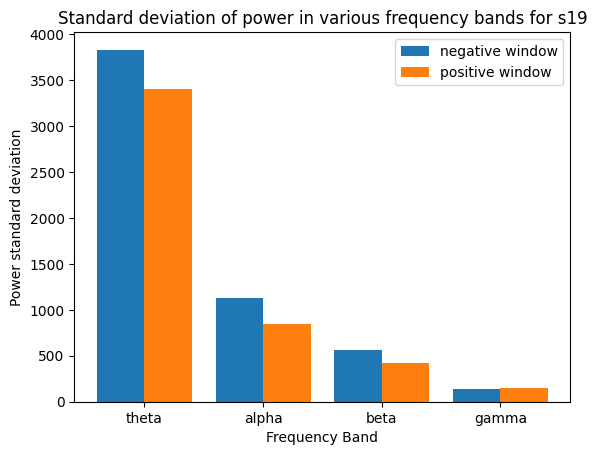

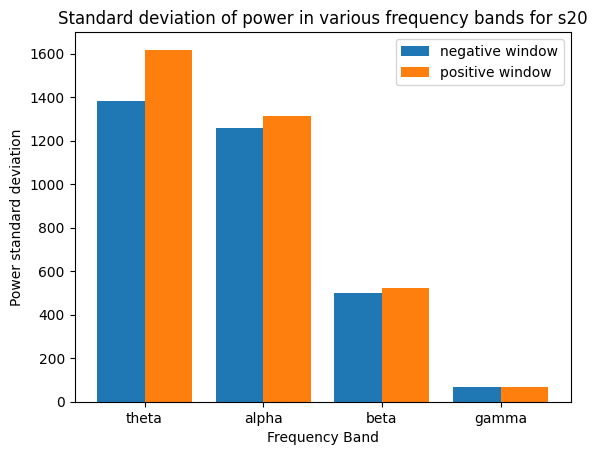

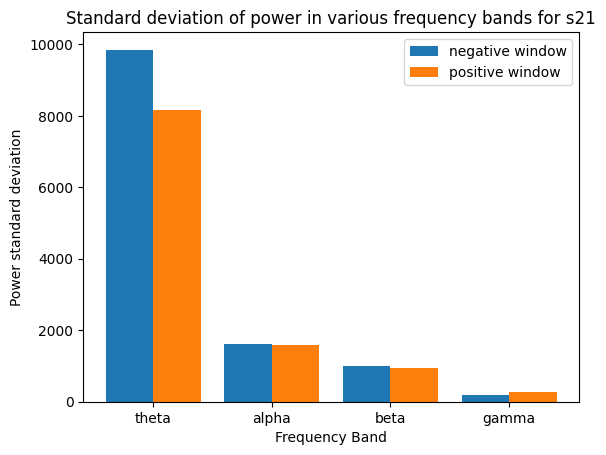

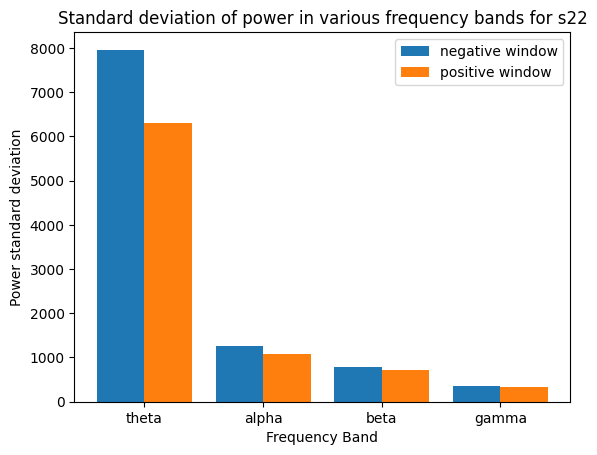

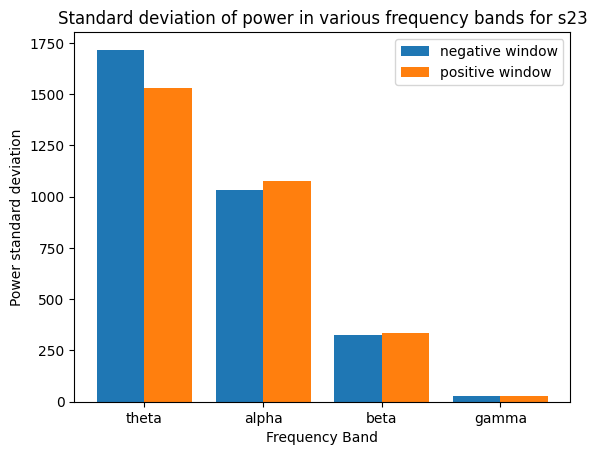

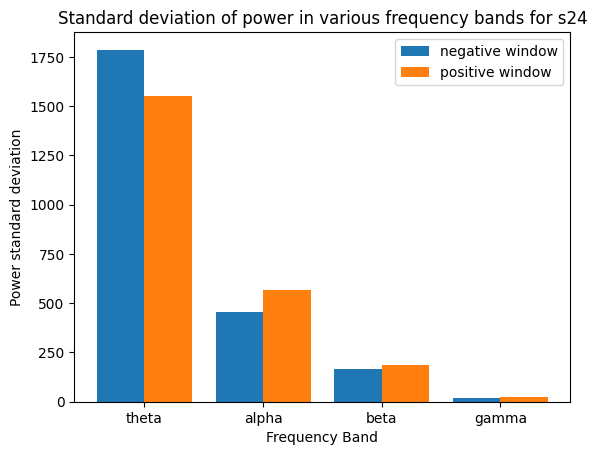

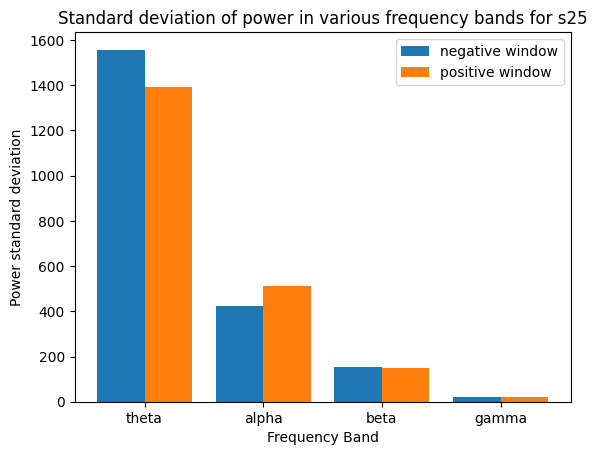

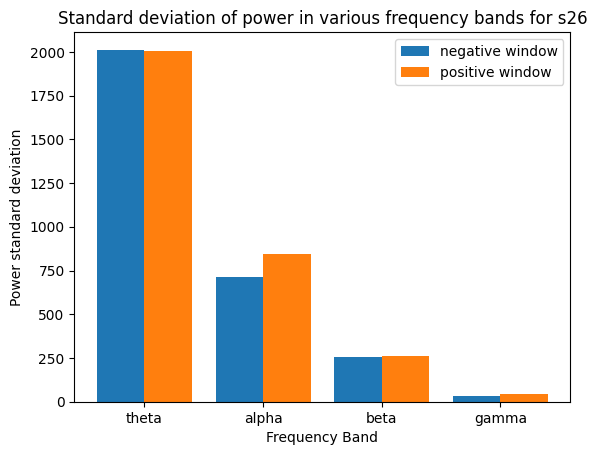

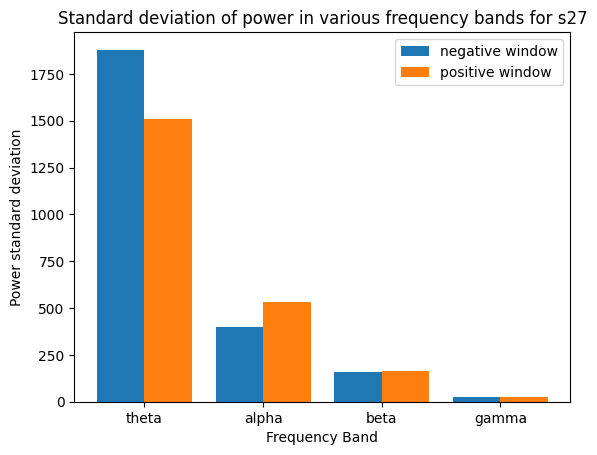

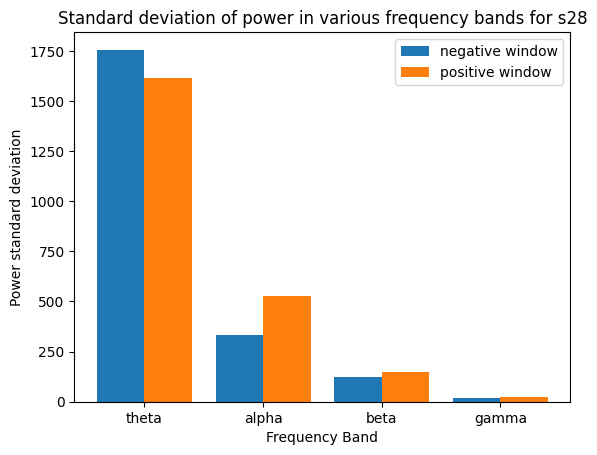

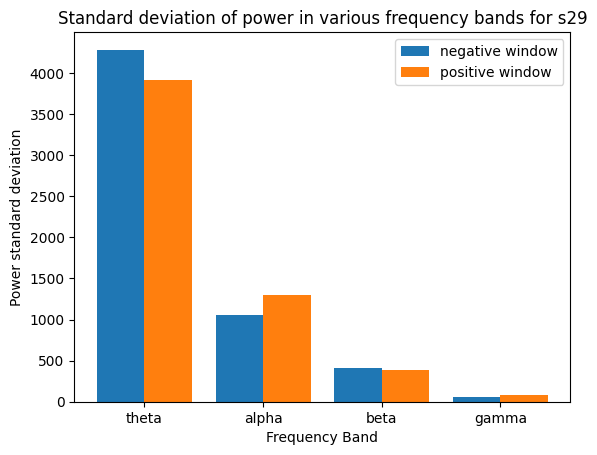

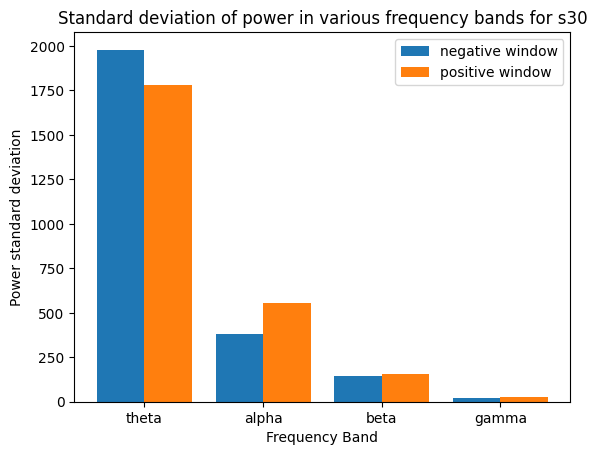

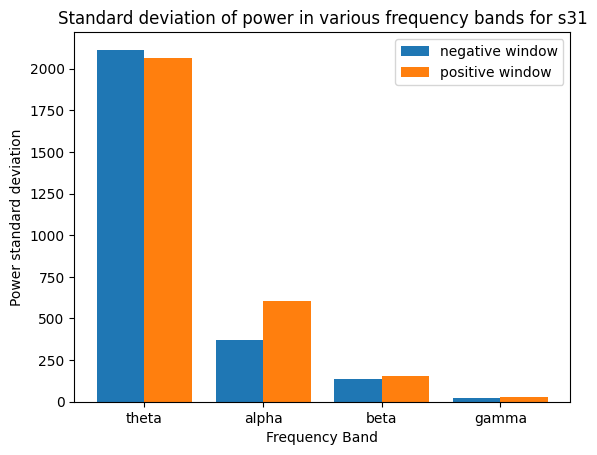

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure()
X = ['theta', 'alpha', 'beta', 'gamma']

for i in range(32):
    neg_mean_power = [negative['theta_power_{}'.format(i)].mean(),
                      negative['alpha_power_{}'.format(i)].mean(), 
                      negative['beta_power_{}'.format(i)].mean(),
                      negative['gamma_power_{}'.format(i)].mean(),
                     ]

    pos_mean_power = [positive['theta_power_{}'.format(i)].mean(),
                      positive['alpha_power_{}'.format(i)].mean(), 
                      positive['beta_power_{}'.format(i)].mean(),
                      positive['gamma_power_{}'.format(i)].mean(),
                     ]



    X_axis = np.arange(len(X))
    plt.figure()
    plt.bar(X_axis - 0.2, neg_mean_power, 0.4, label = 'negative window')
    plt.bar(X_axis + 0.2, pos_mean_power, 0.4, label = 'positive window')
    plt.xticks(X_axis, X)
    plt.xlabel("Frequency Band")
    plt.ylabel("Mean power")
    plt.title("Mean power in various frequency bands for s{}".format(i))
    plt.legend()
    plt.show()

for i in range(32):
    neg_std_power = [negative['theta_power_{}'.format(i)].std(),
                     negative['alpha_power_{}'.format(i)].std(), 
                     negative['beta_power_{}'.format(i)].std(),
                     negative['gamma_power_{}'.format(i)].std(),
                    ]

    pos_std_power = [positive['theta_power_{}'.format(i)].std(),
                     positive['alpha_power_{}'.format(i)].std(), 
                     positive['beta_power_{}'.format(i)].std(),
                     positive['gamma_power_{}'.format(i)].std(),
                    ]
    
    plt.figure()
    plt.bar(X_axis - 0.2, neg_std_power, 0.4, label = 'negative window')
    plt.bar(X_axis + 0.2, pos_std_power, 0.4, label = 'positive window')
    plt.xticks(X_axis, X)
    plt.xlabel("Frequency Band")
    plt.ylabel("Power standard deviation")
    plt.title("Standard deviation of power in various frequency bands for s{}".format(i))
    plt.legend()
    plt.show()

C:\Users\jinke\AppData\Local\Temp\ipykernel_11548\3004059404.py:52: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(color_map)


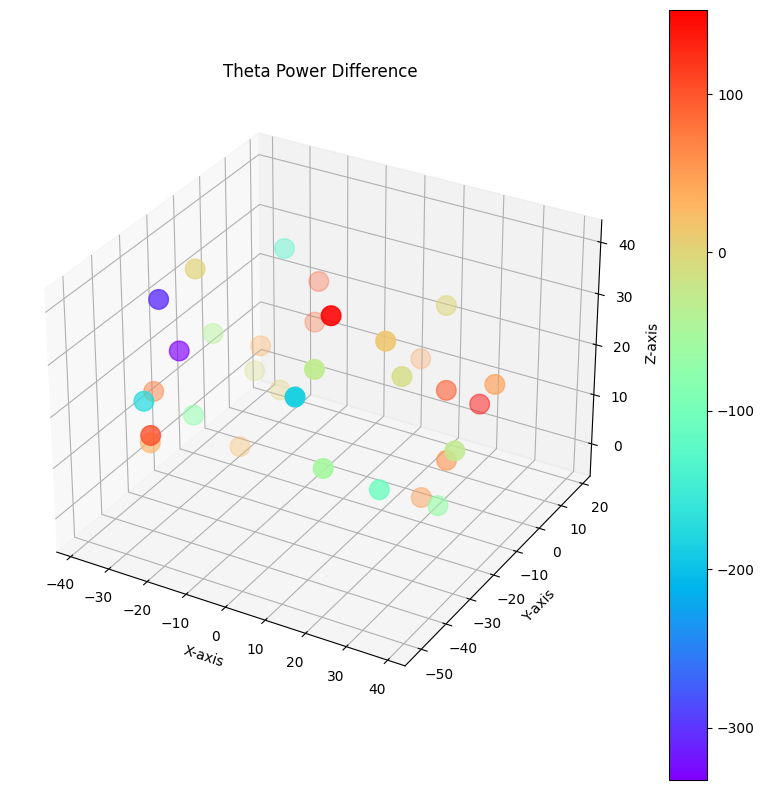

C:\Users\jinke\AppData\Local\Temp\ipykernel_11548\3004059404.py:67: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(color_map)


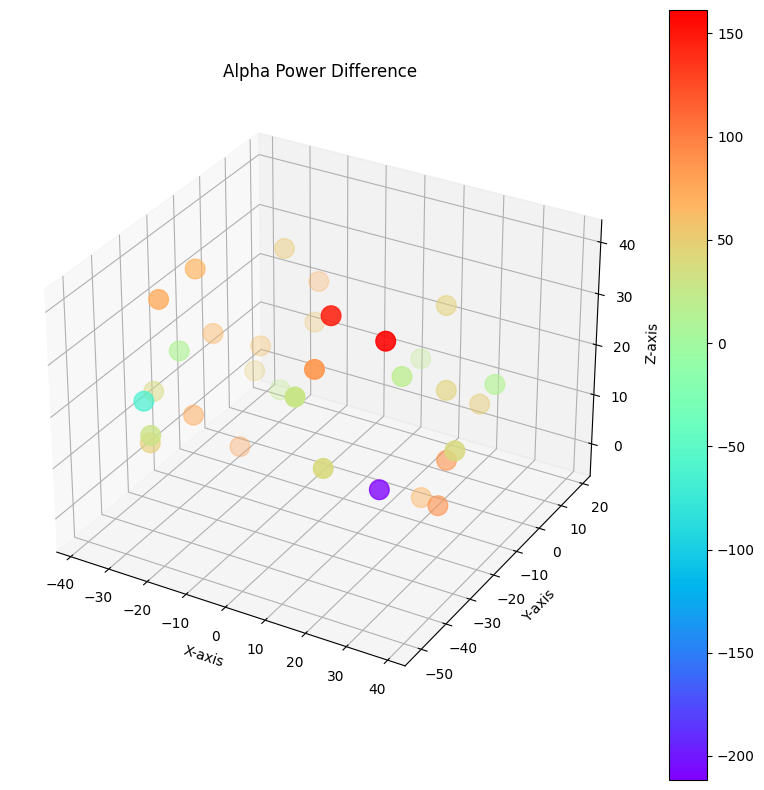

C:\Users\jinke\AppData\Local\Temp\ipykernel_11548\3004059404.py:82: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(color_map)


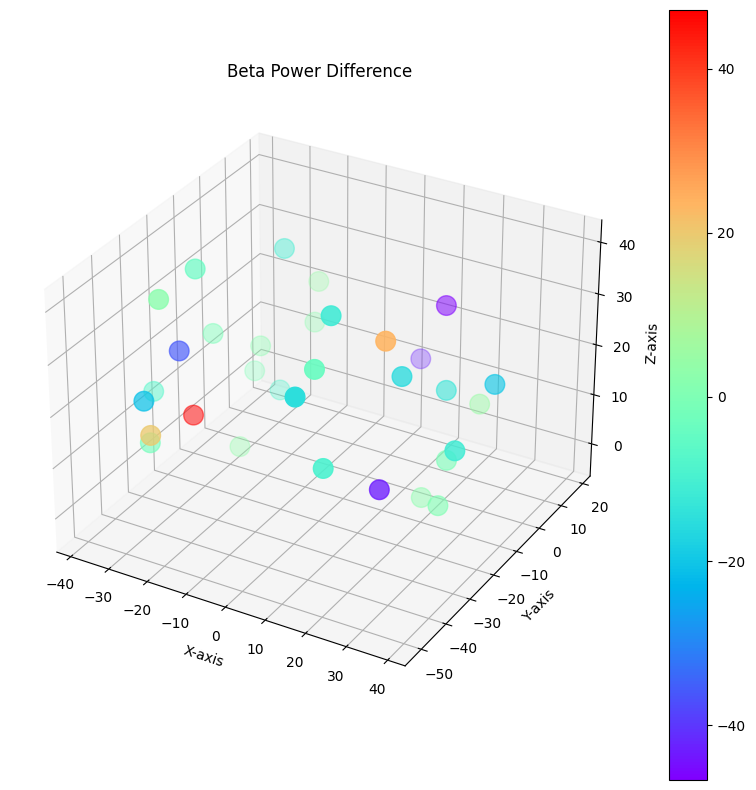

C:\Users\jinke\AppData\Local\Temp\ipykernel_11548\3004059404.py:98: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(color_map)


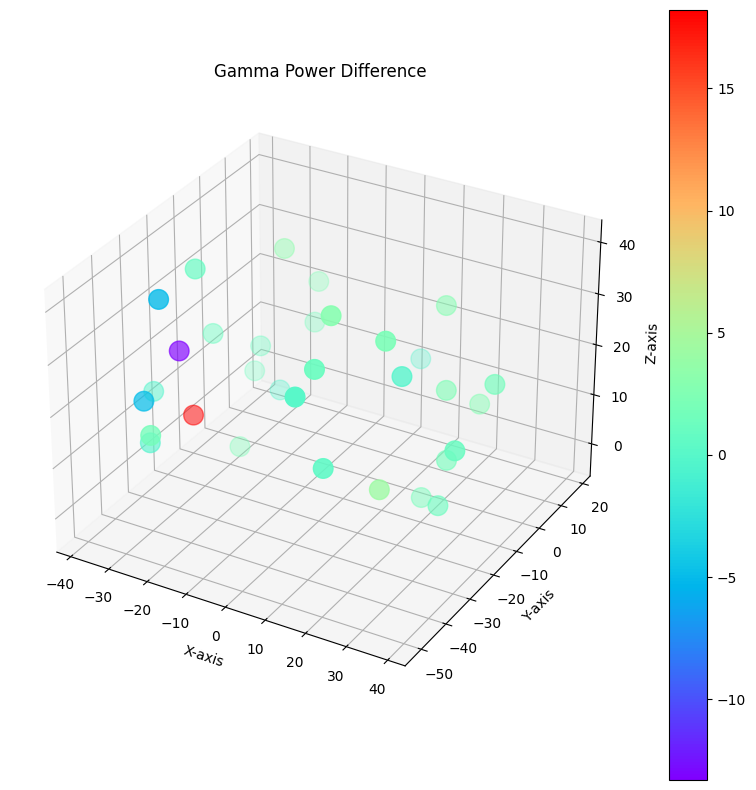

In [21]:
# from: https://www.geeksforgeeks.org/3d-heatmap-in-python/
# MEAN - DIFFERENCE PLOT
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
#from pylab import *
NUM_CLUSTERS = 32

x_pos = np.zeros(NUM_CLUSTERS)
y_pos = np.zeros(NUM_CLUSTERS)
z_pos = np.zeros(NUM_CLUSTERS)
x_neg = np.zeros(NUM_CLUSTERS)
y_neg = np.zeros(NUM_CLUSTERS)
z_neg = np.zeros(NUM_CLUSTERS)

color_pos_theta = np.zeros(NUM_CLUSTERS)
color_neg_theta = np.zeros(NUM_CLUSTERS)
color_pos_alpha = np.zeros(NUM_CLUSTERS)
color_neg_alpha = np.zeros(NUM_CLUSTERS)
color_pos_beta = np.zeros(NUM_CLUSTERS)
color_neg_beta = np.zeros(NUM_CLUSTERS)
color_pos_gamma = np.zeros(NUM_CLUSTERS)
color_neg_gamma = np.zeros(NUM_CLUSTERS)

for i in range(NUM_CLUSTERS):
    x_pos[i] = positive['x_{}'.format(i)].mean()
    y_pos[i] = positive['y_{}'.format(i)].mean()
    z_pos[i] = positive['z_{}'.format(i)].mean()
    color_pos_theta[i] = positive['theta_power_{}'.format(i)].mean()
    color_pos_alpha[i] = positive['alpha_power_{}'.format(i)].mean()
    color_pos_beta[i] = positive['beta_power_{}'.format(i)].mean()
    color_pos_gamma[i] = positive['gamma_power_{}'.format(i)].mean()
    
    x_neg[i] = negative['x_{}'.format(i)].mean()
    y_neg[i] = negative['y_{}'.format(i)].mean()
    z_neg[i] = negative['z_{}'.format(i)].mean()
    color_neg_theta[i] = negative['theta_power_{}'.format(i)].mean()
    color_neg_alpha[i] = negative['alpha_power_{}'.format(i)].mean()
    color_neg_beta[i] = negative['beta_power_{}'.format(i)].mean()
    color_neg_gamma[i] = negative['gamma_power_{}'.format(i)].mean()

# theta
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
color_map = cm.ScalarMappable(cmap=cm.rainbow)
diff = color_pos_theta - color_neg_theta
color_map.set_array(diff)
colors = cm.rainbow((diff-diff.min())/(diff.max()-diff.min()))
img = ax.scatter(x_pos, y_pos, z_pos, c=colors, marker='o', s=200)
plt.colorbar(color_map)
ax.set_title("Theta Power Difference")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

# alpha
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
color_map = cm.ScalarMappable(cmap=cm.rainbow)
diff = color_pos_alpha - color_neg_alpha
color_map.set_array(diff)
colors = cm.rainbow((diff-diff.min())/(diff.max()-diff.min()))
img = ax.scatter(x_pos, y_pos, z_pos, c=colors, marker='o', s=200)
plt.colorbar(color_map)
ax.set_title("Alpha Power Difference")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

# beta
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
color_map = cm.ScalarMappable(cmap=cm.rainbow)
diff = color_pos_beta - color_neg_beta
color_map.set_array(diff)
colors = cm.rainbow((diff-diff.min())/(diff.max()-diff.min()))
img = ax.scatter(x_pos, y_pos, z_pos, c=colors, marker='o', s=200)
plt.colorbar(color_map)
ax.set_title("Beta Power Difference")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()


# gamma
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
color_map = cm.ScalarMappable(cmap=cm.rainbow)
diff = color_pos_gamma - color_neg_gamma
color_map.set_array(diff)
colors = cm.rainbow((diff-diff.min())/(diff.max()-diff.min()))
img = ax.scatter(x_pos, y_pos, z_pos, c=colors, marker='o', s=200)
plt.colorbar(color_map)
ax.set_title("Gamma Power Difference")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()



In [22]:
print(color_pos_theta.mean())
print(color_neg_theta.mean())

print(color_pos_alpha.mean())
print(color_neg_alpha.mean())

print(color_pos_beta.mean())
print(color_neg_beta.mean())

print(color_pos_gamma.mean())
print(color_neg_gamma.mean())

1110.5555115826282
1125.4367063703025
529.8655325832367
483.9825422059741
255.1119958255578
261.7349751286656
37.02401952473591
35.924142241028115


C:\Users\jinke\AppData\Local\Temp\ipykernel_11548\3135481363.py:52: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(color_map)


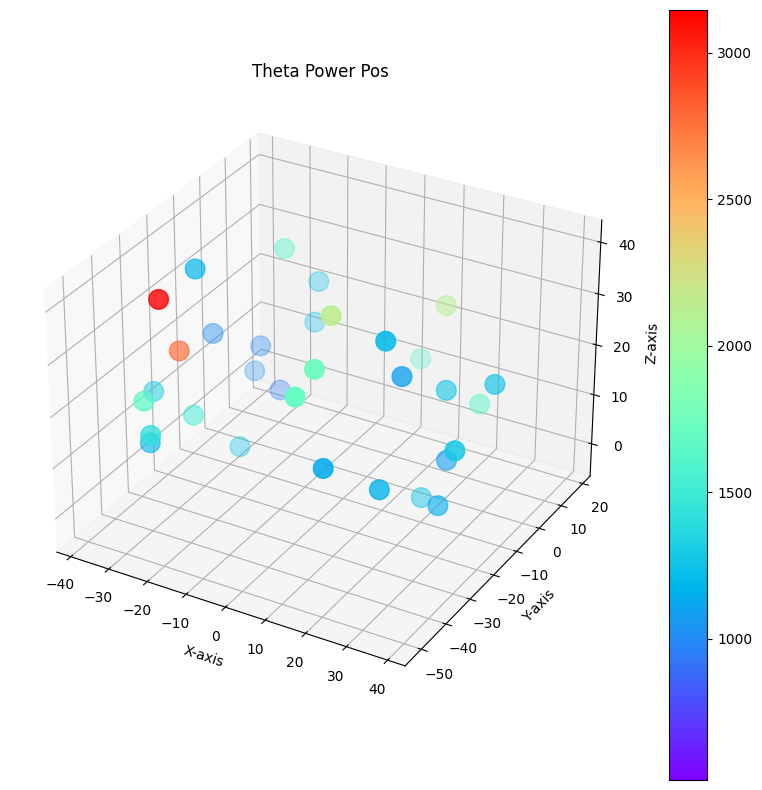

C:\Users\jinke\AppData\Local\Temp\ipykernel_11548\3135481363.py:67: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(color_map)


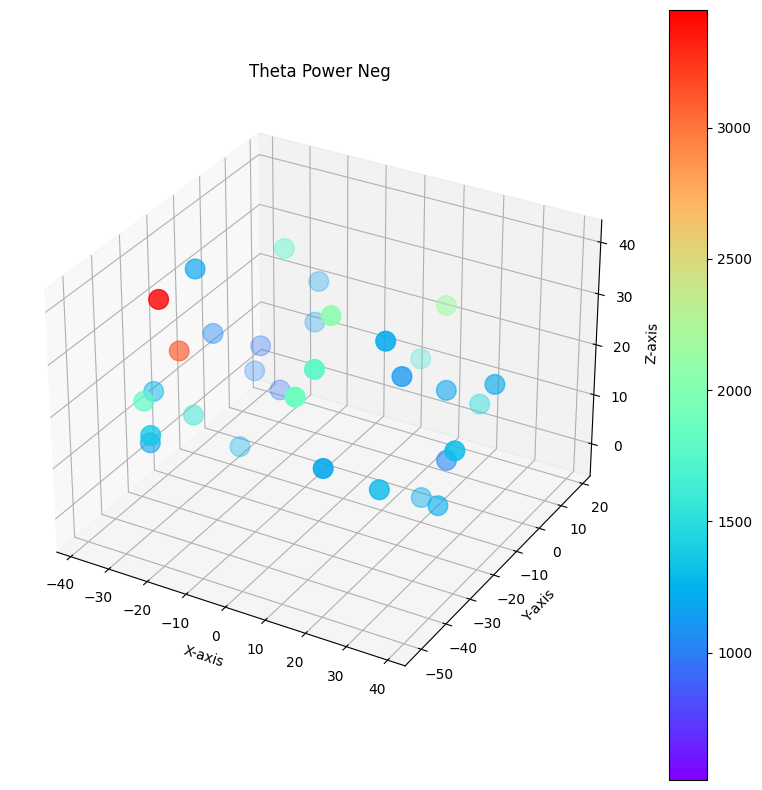

C:\Users\jinke\AppData\Local\Temp\ipykernel_11548\3135481363.py:82: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(color_map)


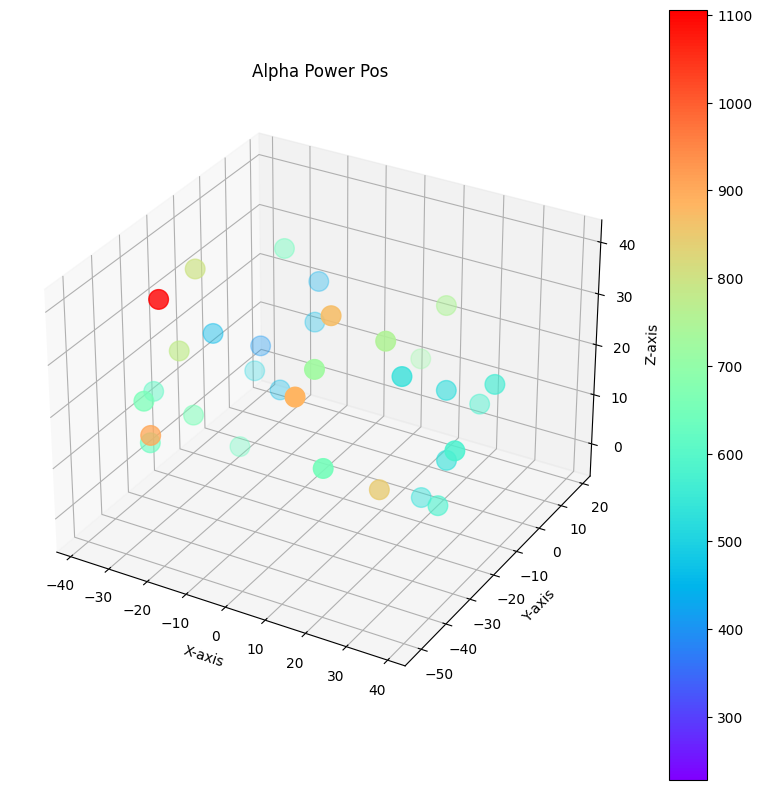

C:\Users\jinke\AppData\Local\Temp\ipykernel_11548\3135481363.py:97: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(color_map)


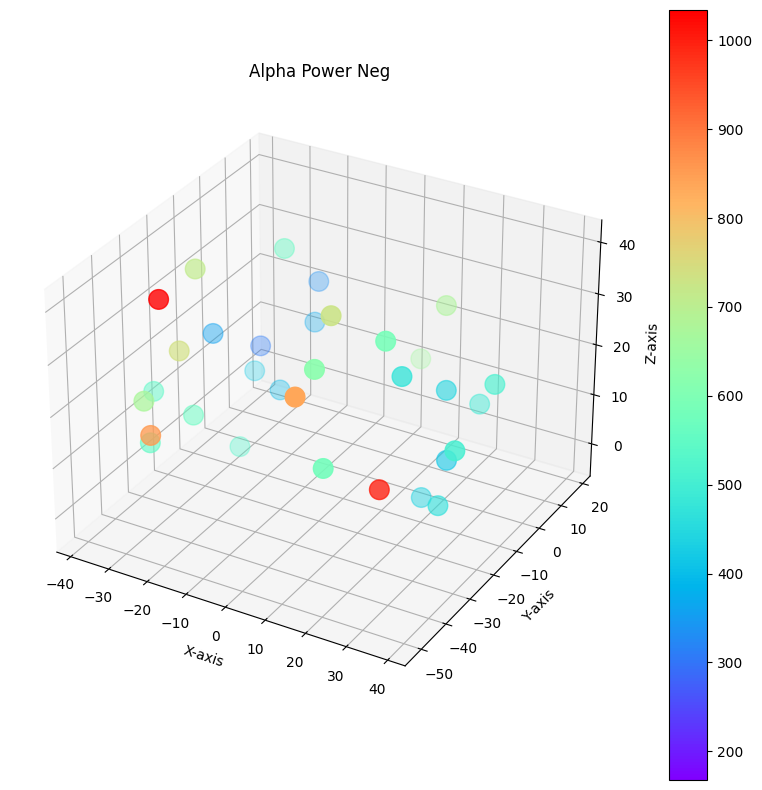

C:\Users\jinke\AppData\Local\Temp\ipykernel_11548\3135481363.py:112: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(color_map)


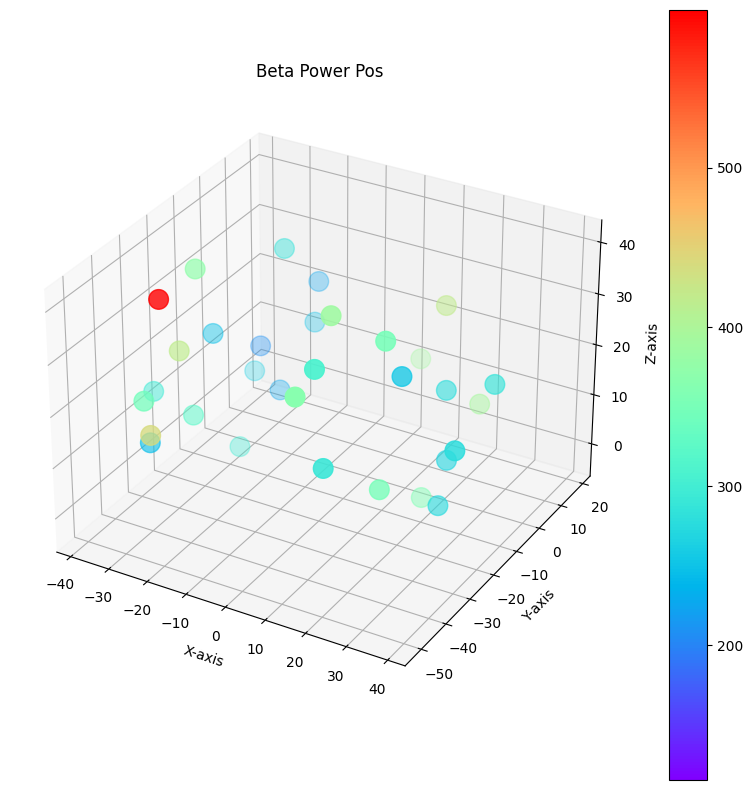

C:\Users\jinke\AppData\Local\Temp\ipykernel_11548\3135481363.py:127: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(color_map)


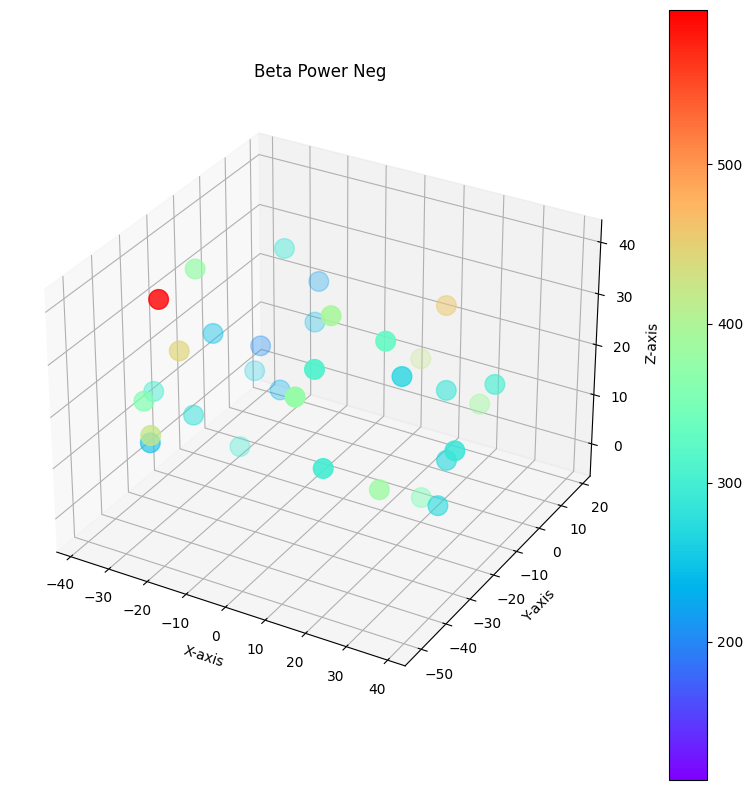

C:\Users\jinke\AppData\Local\Temp\ipykernel_11548\3135481363.py:142: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(color_map)


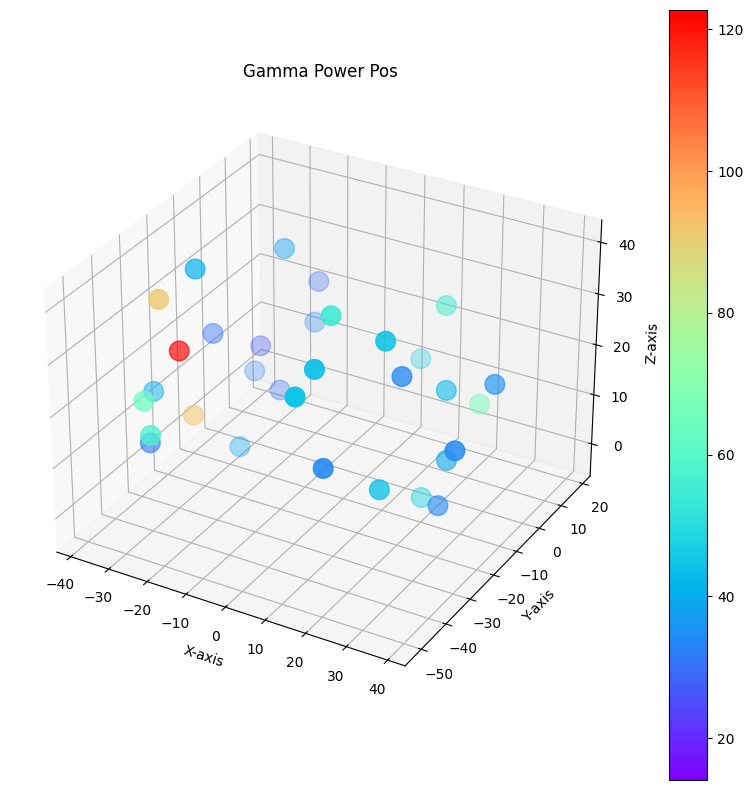

C:\Users\jinke\AppData\Local\Temp\ipykernel_11548\3135481363.py:157: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(color_map)


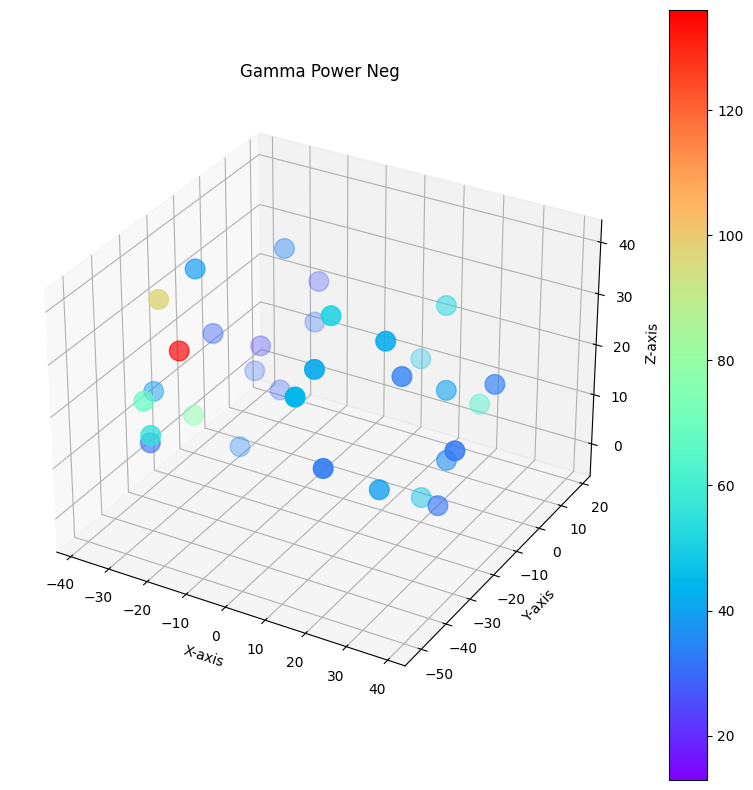

In [23]:
# from: https://www.geeksforgeeks.org/3d-heatmap-in-python/
# MEAN - DIFFERENCE PLOT
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
#from pylab import *
NUM_CLUSTERS = 32

x_pos = np.zeros(NUM_CLUSTERS)
y_pos = np.zeros(NUM_CLUSTERS)
z_pos = np.zeros(NUM_CLUSTERS)
x_neg = np.zeros(NUM_CLUSTERS)
y_neg = np.zeros(NUM_CLUSTERS)
z_neg = np.zeros(NUM_CLUSTERS)

color_pos_theta = np.zeros(NUM_CLUSTERS)
color_neg_theta = np.zeros(NUM_CLUSTERS)
color_pos_alpha = np.zeros(NUM_CLUSTERS)
color_neg_alpha = np.zeros(NUM_CLUSTERS)
color_pos_beta = np.zeros(NUM_CLUSTERS)
color_neg_beta = np.zeros(NUM_CLUSTERS)
color_pos_gamma = np.zeros(NUM_CLUSTERS)
color_neg_gamma = np.zeros(NUM_CLUSTERS)

for i in range(NUM_CLUSTERS):
    x_pos[i] = positive['x_{}'.format(i)].mean()
    y_pos[i] = positive['y_{}'.format(i)].mean()
    z_pos[i] = positive['z_{}'.format(i)].mean()
    color_pos_theta[i] = positive['theta_power_{}'.format(i)].mean()
    color_pos_alpha[i] = positive['alpha_power_{}'.format(i)].mean()
    color_pos_beta[i] = positive['beta_power_{}'.format(i)].mean()
    color_pos_gamma[i] = positive['gamma_power_{}'.format(i)].mean()
    
    x_neg[i] = negative['x_{}'.format(i)].mean()
    y_neg[i] = negative['y_{}'.format(i)].mean()
    z_neg[i] = negative['z_{}'.format(i)].mean()
    color_neg_theta[i] = negative['theta_power_{}'.format(i)].mean()
    color_neg_alpha[i] = negative['alpha_power_{}'.format(i)].mean()
    color_neg_beta[i] = negative['beta_power_{}'.format(i)].mean()
    color_neg_gamma[i] = negative['gamma_power_{}'.format(i)].mean()

# theta
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
color_map = cm.ScalarMappable(cmap=cm.rainbow)
diff = color_pos_theta 
color_map.set_array(diff)
colors = cm.rainbow(diff/diff.max())
img = ax.scatter(x_pos, y_pos, z_pos, c=colors, marker='o', s=200)
plt.colorbar(color_map)
ax.set_title("Theta Power Pos")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

# theta
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
color_map = cm.ScalarMappable(cmap=cm.rainbow)
diff = color_neg_theta 
color_map.set_array(diff)
colors = cm.rainbow(diff/diff.max())
img = ax.scatter(x_pos, y_pos, z_pos, c=colors, marker='o', s=200)
plt.colorbar(color_map)
ax.set_title("Theta Power Neg")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

# alpha
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
color_map = cm.ScalarMappable(cmap=cm.rainbow)
diff = color_pos_alpha
color_map.set_array(diff)
colors = cm.rainbow(diff/diff.max())
img = ax.scatter(x_pos, y_pos, z_pos, c=colors, marker='o', s=200)
plt.colorbar(color_map)
ax.set_title("Alpha Power Pos")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

# alpha
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
color_map = cm.ScalarMappable(cmap=cm.rainbow)
diff = color_neg_alpha
color_map.set_array(diff)
colors = cm.rainbow(diff/diff.max())
img = ax.scatter(x_pos, y_pos, z_pos, c=colors, marker='o', s=200)
plt.colorbar(color_map)
ax.set_title("Alpha Power Neg")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

# beta
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
color_map = cm.ScalarMappable(cmap=cm.rainbow)
diff = color_pos_beta
color_map.set_array(diff)
colors = cm.rainbow(diff/diff.max())
img = ax.scatter(x_pos, y_pos, z_pos, c=colors, marker='o', s=200)
plt.colorbar(color_map)
ax.set_title("Beta Power Pos")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

# beta
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
color_map = cm.ScalarMappable(cmap=cm.rainbow)
diff = color_neg_beta
color_map.set_array(diff)
colors = cm.rainbow(diff/diff.max())
img = ax.scatter(x_pos, y_pos, z_pos, c=colors, marker='o', s=200)
plt.colorbar(color_map)
ax.set_title("Beta Power Neg")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

# gamma
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
color_map = cm.ScalarMappable(cmap=cm.rainbow)
diff = color_pos_gamma
color_map.set_array(diff)
colors = cm.rainbow(diff/diff.max())
img = ax.scatter(x_pos, y_pos, z_pos, c=colors, marker='o', s=200)
plt.colorbar(color_map)
ax.set_title("Gamma Power Pos")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

# gamma
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
color_map = cm.ScalarMappable(cmap=cm.rainbow)
diff = color_neg_gamma
color_map.set_array(diff)
colors = cm.rainbow(diff/diff.max())
img = ax.scatter(x_pos, y_pos, z_pos, c=colors, marker='o', s=200)
plt.colorbar(color_map)
ax.set_title("Gamma Power Neg")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

